In [3411]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle 
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lars, Ridge, Lasso, ElasticNet, BayesianRidge

## Analisis de Datos

### Lectura de Datos

In [3412]:
df = pd.read_csv('datos/train_PAY_AMT2.csv', sep = '|' )

In [3413]:
pd.set_option('display.max_columns',None)
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_3  PAY_4  \
0           24527   180000.0    1          1         2   29      0      0   
1           20750   210000.0    1          2         2   32      2      0   
2            3788   210000.0    1          2         1   39     -1     -1   
3           25888    90000.0    2          2         2   26      0      0   
4            5586   150000.0    2          2         1   44      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        25947    30000.0    2          3         2   24      2      2   
5621          576   220000.0    2          1         1   56     -2     -2   
5622         3432   150000.0    2          1         1   52      2      0   
5623         2049   480000.0    2          1         1   45     -1     -1   
5624        15877   200000.0    2          1         2   35     -1     -1   

      PAY_5  PAY_6  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0         0     -2   117488.0   118504.0   119034.0     -966.0     -966.0   
1         0      0   165227.0   161427.0   164860.0   187329.0   186079.0   
2        -1     -1     1443.0     1443.0     1443.0     1443.0     1443.0   
3         2      2    71353.0    72707.0    74101.0    72818.0    73940.0   
4         0      0    55504.0    22050.0    17360.0    17360.0    12000.0   
...     ...    ...        ...        ...        ...        ...        ...   
5620      2      3    14804.0    16546.0    15985.0    17869.0    17291.0   
5621     -1     -1        0.0        0.0        0.0     5889.0      300.0   
5622      0     -1     3227.0     1129.0     2034.0     2140.0     6731.0   
5623     -1     -1    10928.0      650.0     1597.0     3750.0     9429.0   
5624     -1     -1     2708.0     3514.0     2297.0      928.0        0.0   

      PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       4400.0    2500.0     937.0       0.0       0.0  
1          0.0    5666.0   24886.0    6282.0    6494.0  
2       1443.0    1443.0    1443.0    1443.0    1443.0  
3       3168.0    3143.0    2700.0    3600.0    1700.0  
4       1200.0       0.0       0.0       0.0       0.0  
...        ...       ...       ...       ...       ...  
5620    2300.0       0.0    2300.0       0.0       0.0  
5621       0.0       0.0    5889.0     300.0     165.0  
5622     802.0    1705.0    1806.0    6427.0      16.0  
5623     650.0    1597.0    3750.0    9429.0    1000.0  
5624    3514.0    2297.0     928.0       0.0    2308.0  

[5625 rows x 20 columns]

In [3414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CUSTOMER_ID  5625 non-null   int64  
 1   LIMIT_BAL    5625 non-null   float64
 2   SEX          5625 non-null   int64  
 3   EDUCATION    5625 non-null   int64  
 4   MARRIAGE     5625 non-null   int64  
 5   AGE          5625 non-null   int64  
 6   PAY_3        5625 non-null   int64  
 7   PAY_4        5625 non-null   int64  
 8   PAY_5        5625 non-null   int64  
 9   PAY_6        5625 non-null   int64  
 10  BILL_AMT2    5625 non-null   float64
 11  BILL_AMT3    5625 non-null   float64
 12  BILL_AMT4    5625 non-null   float64
 13  BILL_AMT5    5625 non-null   float64
 14  BILL_AMT6    5625 non-null   float64
 15  PAY_AMT2     5625 non-null   float64
 16  PAY_AMT3     5625 non-null   float64
 17  PAY_AMT4     5625 non-null   float64
 18  PAY_AMT5     5625 non-null   float64
 19  PAY_AM

In [3415]:
df.describe()

CUSTOMER_ID       LIMIT_BAL         SEX    EDUCATION     MARRIAGE  \
count   5625.000000     5625.000000  5625.00000  5625.000000  5625.000000   
mean   15032.204978   171011.555556     1.60800     1.853156     1.561956   
std     8692.201263   131481.021196     0.48824     0.783760     0.520671   
min        9.000000    10000.000000     1.00000     0.000000     0.000000   
25%     7528.000000    60000.000000     1.00000     1.000000     1.000000   
50%    15091.000000   140000.000000     2.00000     2.000000     2.000000   
75%    22635.000000   240000.000000     2.00000     2.000000     2.000000   
max    30000.000000  1000000.000000     2.00000     6.000000     3.000000   

               AGE        PAY_3        PAY_4        PAY_5        PAY_6  \
count  5625.000000  5625.000000  5625.000000  5625.000000  5625.000000   
mean     35.468089    -0.209956    -0.244622    -0.282311    -0.311644   
std       9.194733     1.160566     1.153833     1.129402     1.139043   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      41.000000     0.000000     0.000000     0.000000     0.000000   
max      73.000000     7.000000     8.000000     7.000000     7.000000   

           BILL_AMT2      BILL_AMT3      BILL_AMT4      BILL_AMT5  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    49503.747733   47084.537067   43153.204267   40247.077867   
std     73970.203196   70371.056836   66621.933175   62785.884958   
min    -22960.000000  -14998.000000  -81334.000000  -19205.000000   
25%      2881.000000    2659.000000    2297.000000    1790.000000   
50%     20762.000000   19631.000000   18568.000000   17876.000000   
75%     63445.000000   60158.000000   54292.000000   49743.000000   
max    983931.000000  693131.000000  891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    38953.436800    5699.687467    5125.630933    4933.809244   
std     62045.689036   16185.192415   18182.144418   14756.853580   
min    -21364.000000       0.000000       0.000000       0.000000   
25%      1362.000000    1000.000000     398.000000     316.000000   
50%     16745.000000    2070.000000    1823.000000    1605.000000   
75%     48376.000000    5008.000000    4500.000000    4385.000000   
max    961664.000000  388126.000000  896040.000000  432130.000000   

            PAY_AMT5       PAY_AMT6  
count    5625.000000    5625.000000  
mean     4948.330489    5400.883733  
std     15418.554999   17507.490173  
min         0.000000       0.000000  
25%       302.000000     199.000000  
50%      1600.000000    1582.000000  
75%      4183.000000    4095.000000  
max    388071.000000  308000.000000

In [3416]:
df.isnull().sum()

CUSTOMER_ID    0
LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
dtype: int64

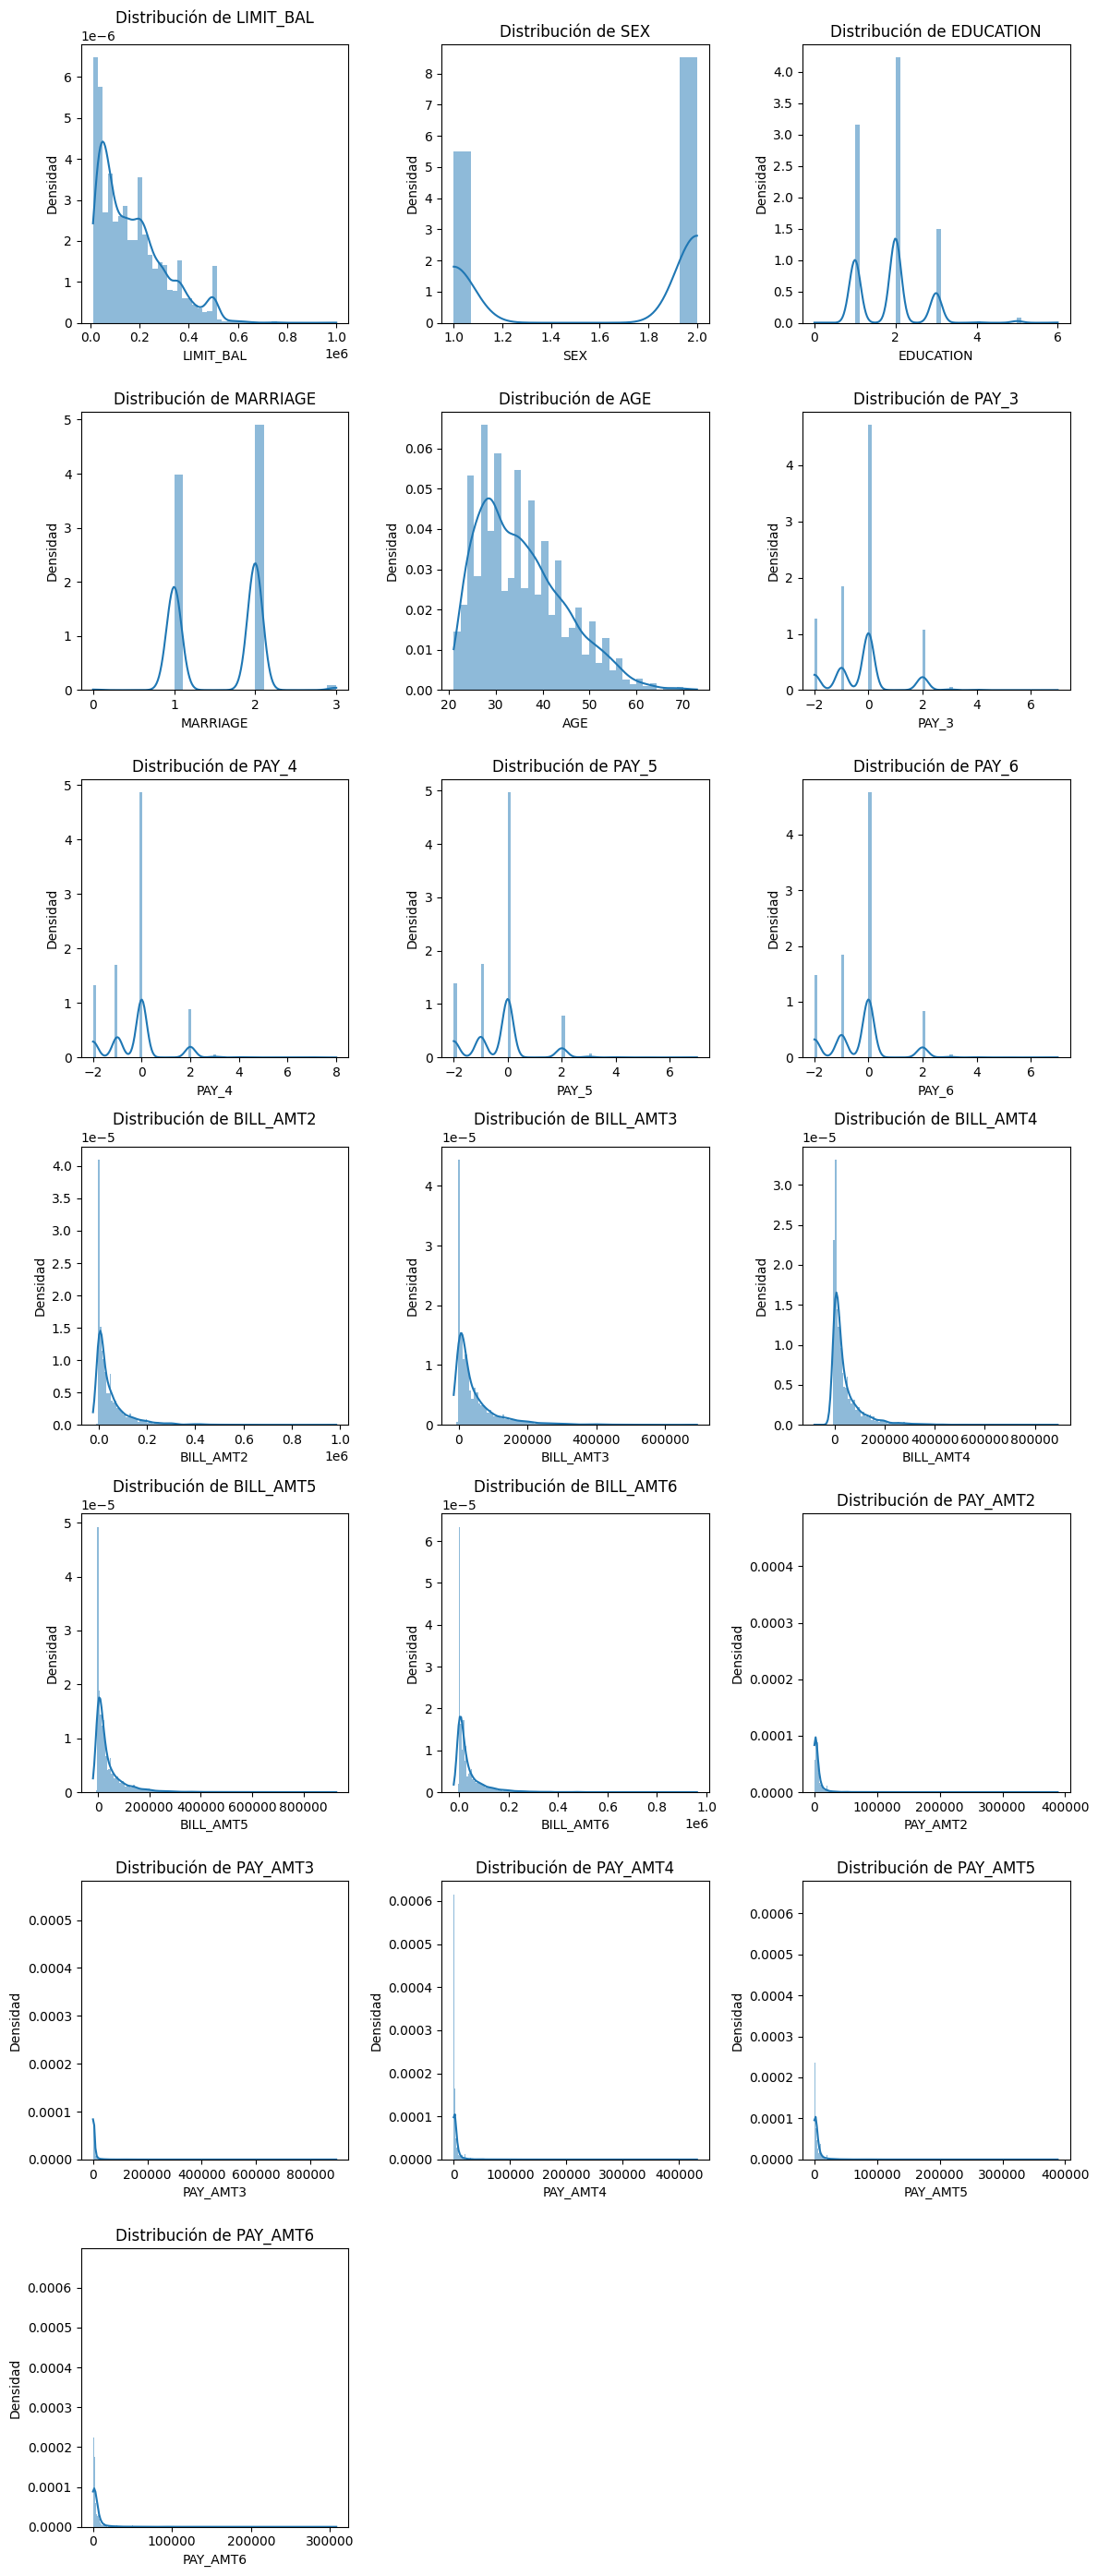

In [3417]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

### Ingenieria de variables

In [3418]:
df.describe()

CUSTOMER_ID       LIMIT_BAL         SEX    EDUCATION     MARRIAGE  \
count   5625.000000     5625.000000  5625.00000  5625.000000  5625.000000   
mean   15032.204978   171011.555556     1.60800     1.853156     1.561956   
std     8692.201263   131481.021196     0.48824     0.783760     0.520671   
min        9.000000    10000.000000     1.00000     0.000000     0.000000   
25%     7528.000000    60000.000000     1.00000     1.000000     1.000000   
50%    15091.000000   140000.000000     2.00000     2.000000     2.000000   
75%    22635.000000   240000.000000     2.00000     2.000000     2.000000   
max    30000.000000  1000000.000000     2.00000     6.000000     3.000000   

               AGE        PAY_3        PAY_4        PAY_5        PAY_6  \
count  5625.000000  5625.000000  5625.000000  5625.000000  5625.000000   
mean     35.468089    -0.209956    -0.244622    -0.282311    -0.311644   
std       9.194733     1.160566     1.153833     1.129402     1.139043   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      41.000000     0.000000     0.000000     0.000000     0.000000   
max      73.000000     7.000000     8.000000     7.000000     7.000000   

           BILL_AMT2      BILL_AMT3      BILL_AMT4      BILL_AMT5  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    49503.747733   47084.537067   43153.204267   40247.077867   
std     73970.203196   70371.056836   66621.933175   62785.884958   
min    -22960.000000  -14998.000000  -81334.000000  -19205.000000   
25%      2881.000000    2659.000000    2297.000000    1790.000000   
50%     20762.000000   19631.000000   18568.000000   17876.000000   
75%     63445.000000   60158.000000   54292.000000   49743.000000   
max    983931.000000  693131.000000  891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    38953.436800    5699.687467    5125.630933    4933.809244   
std     62045.689036   16185.192415   18182.144418   14756.853580   
min    -21364.000000       0.000000       0.000000       0.000000   
25%      1362.000000    1000.000000     398.000000     316.000000   
50%     16745.000000    2070.000000    1823.000000    1605.000000   
75%     48376.000000    5008.000000    4500.000000    4385.000000   
max    961664.000000  388126.000000  896040.000000  432130.000000   

            PAY_AMT5       PAY_AMT6  
count    5625.000000    5625.000000  
mean     4948.330489    5400.883733  
std     15418.554999   17507.490173  
min         0.000000       0.000000  
25%       302.000000     199.000000  
50%      1600.000000    1582.000000  
75%      4183.000000    4095.000000  
max    388071.000000  308000.000000

In [3419]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_3  PAY_4  \
0           24527   180000.0    1          1         2   29      0      0   
1           20750   210000.0    1          2         2   32      2      0   
2            3788   210000.0    1          2         1   39     -1     -1   
3           25888    90000.0    2          2         2   26      0      0   
4            5586   150000.0    2          2         1   44      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        25947    30000.0    2          3         2   24      2      2   
5621          576   220000.0    2          1         1   56     -2     -2   
5622         3432   150000.0    2          1         1   52      2      0   
5623         2049   480000.0    2          1         1   45     -1     -1   
5624        15877   200000.0    2          1         2   35     -1     -1   

      PAY_5  PAY_6  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0         0     -2   117488.0   118504.0   119034.0     -966.0     -966.0   
1         0      0   165227.0   161427.0   164860.0   187329.0   186079.0   
2        -1     -1     1443.0     1443.0     1443.0     1443.0     1443.0   
3         2      2    71353.0    72707.0    74101.0    72818.0    73940.0   
4         0      0    55504.0    22050.0    17360.0    17360.0    12000.0   
...     ...    ...        ...        ...        ...        ...        ...   
5620      2      3    14804.0    16546.0    15985.0    17869.0    17291.0   
5621     -1     -1        0.0        0.0        0.0     5889.0      300.0   
5622      0     -1     3227.0     1129.0     2034.0     2140.0     6731.0   
5623     -1     -1    10928.0      650.0     1597.0     3750.0     9429.0   
5624     -1     -1     2708.0     3514.0     2297.0      928.0        0.0   

      PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       4400.0    2500.0     937.0       0.0       0.0  
1          0.0    5666.0   24886.0    6282.0    6494.0  
2       1443.0    1443.0    1443.0    1443.0    1443.0  
3       3168.0    3143.0    2700.0    3600.0    1700.0  
4       1200.0       0.0       0.0       0.0       0.0  
...        ...       ...       ...       ...       ...  
5620    2300.0       0.0    2300.0       0.0       0.0  
5621       0.0       0.0    5889.0     300.0     165.0  
5622     802.0    1705.0    1806.0    6427.0      16.0  
5623     650.0    1597.0    3750.0    9429.0    1000.0  
5624    3514.0    2297.0     928.0       0.0    2308.0  

[5625 rows x 20 columns]

In [3420]:
# Ratio de deuda respecto al limite de credito
df['Ratio_Debt'] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)/df['LIMIT_BAL'] 

In [3421]:
df['Max_Estatus_Pay'] = df[['PAY_3','PAY_4','PAY_5','PAY_6']].max(axis = 1) # Maximo valor Pay

In [3422]:
df['Promedio_Estatus_Pay'] = df[['PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis = 1) # Promedio valor Pay

In [3423]:
df['Ratio_Payment'] = df[['PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1) / df['LIMIT_BAL'] # Cantidad pagada sobre limite de credito

In [3424]:
df['Count_Pay_Retrasados'] = (df[['PAY_3','PAY_4','PAY_5','PAY_6']] > 0 ).sum(axis = 1) # Conrteo de registros de meses atrasados

In [3425]:
df['Count_Pay_A_Tiempo'] = (df[['PAY_3','PAY_4','PAY_5','PAY_6']] == -1).sum(axis = 1) # Conteo de meses pagados a tiempo

In [3426]:
df['Total_Pay'] = df[['PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1) # Total pagado 

In [3427]:
df['Total_Bill'] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1) # Deuda total

In [3428]:
df['Pay/Bill'] =np.where(df['Total_Bill'] == 0, 0, df['Total_Pay'] / df['Total_Bill']) # Ratio de pago sobre deuda

In [3429]:
df['Pay_amount_mean'] = df[['PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis = 1) # Promedio de cantidad a pagar

In [3430]:
len(df[df['Pay/Bill'] == np.inf])

0

In [3431]:
df['Pay_tendencia'] = df['PAY_AMT3'] - df ['PAY_AMT6'] # Comparacion del ultimo mes y el primero respecto a lo que se paga

In [3432]:
df['Bill_tendencia'] = df['BILL_AMT2'] - df['BILL_AMT6'] # Comparacion del ultimo mes y el primero respecto a la deuda

In [3433]:
df['Bill_amount_mean'] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis = 1) # Promedio de cantidad de deuda

In [3434]:
df['Diff_Bill_Pay'] = df['Total_Bill'] - df ['Total_Pay'] # Diferencia de Deuda con lo que se paga

In [3435]:
df['Pay_tendencia_Amplia'] = df[['PAY_AMT4','PAY_AMT3']].mean(axis = 1) - df[['PAY_AMT5','PAY_AMT6']].mean(axis =1)
# Tendencia amplia de la cantidad pagada 

In [3436]:
df['Bill_tendencia_Amplia'] = df[['BILL_AMT2','BILL_AMT3']].mean(axis = 1) - df[['BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis =1)
# Tendencia amplia de la deuda

In [3437]:
df['Diff_Bill_Pay_Tendencia'] = ((df['BILL_AMT3'] - df['PAY_AMT3']) - (df['BILL_AMT6'] - df['PAY_AMT6']))
# Tendencia de la diferencia entre la deuda y lo pagado 

In [3438]:
df['Diff_Bill_Pay_Tendencia_Amplia'] = (
    (df[['BILL_AMT2', 'BILL_AMT3','BILL_AMT4']].mean(axis=1)  - df[['PAY_AMT4', 'PAY_AMT3']].mean(axis=1))
    - 
    ( df[['BILL_AMT5', 'BILL_AMT6']].mean(axis=1) - df[['PAY_AMT5', 'PAY_AMT6']].mean(axis=1))
)
# Tendencia amplia de la diferencia entre la deuda y lo pagado 

In [3439]:
df['Meses_Pago_Completo'] = ( (df['PAY_AMT3'] >= df['BILL_AMT3']).astype(int) + (df['PAY_AMT4'] >= df['BILL_AMT4']).astype(int) + (
    df['PAY_AMT5'] >= df['BILL_AMT5']).astype(int) +
    (df['PAY_AMT6'] >= df['BILL_AMT6']).astype(int))

In [3440]:
df['Meses_Deuda'] = ((df['PAY_AMT3'] <= df['BILL_AMT3']).astype(int) + (df['PAY_AMT4'] <= df['BILL_AMT4']).astype(int) + (
    df['PAY_AMT5'] <= df['BILL_AMT5']).astype(int) +
    (df['PAY_AMT6'] <= df['BILL_AMT6']).astype(int))

In [3441]:
df['Age_Quartile'] = pd.qcut(df['AGE'], q =4, labels = ['Joven', 'Adulto joven', 'Adulto', 'Mayor'])

In [3442]:
df['Pay_tendencia_ponderada'] =  (df['PAY_AMT3'] * 1) + (df['PAY_AMT4'] * 0.75) + (df['PAY_AMT5'] * 0.5 ) + (
                                df['PAY_AMT6'] * 0.25)
                                

In [3443]:
df['Bill_tendencia_ponderada'] = (df['BILL_AMT2'] * 1) + (df['BILL_AMT3'] * 0.8) + (df['BILL_AMT4'] * 0.6 ) + (
                                df['BILL_AMT5'] * 0.4) + (df['BILL_AMT6'] * 0.2)
                                

In [3444]:
df.isna().sum()

CUSTOMER_ID                       0
LIMIT_BAL                         0
SEX                               0
EDUCATION                         0
MARRIAGE                          0
AGE                               0
PAY_3                             0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT2                         0
BILL_AMT3                         0
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT2                          0
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
Ratio_Debt                        0
Max_Estatus_Pay                   0
Promedio_Estatus_Pay              0
Ratio_Payment                     0
Count_Pay_Retrasados              0
Count_Pay_A_Tiempo                0
Total_Pay                         0
Total_Bill                  

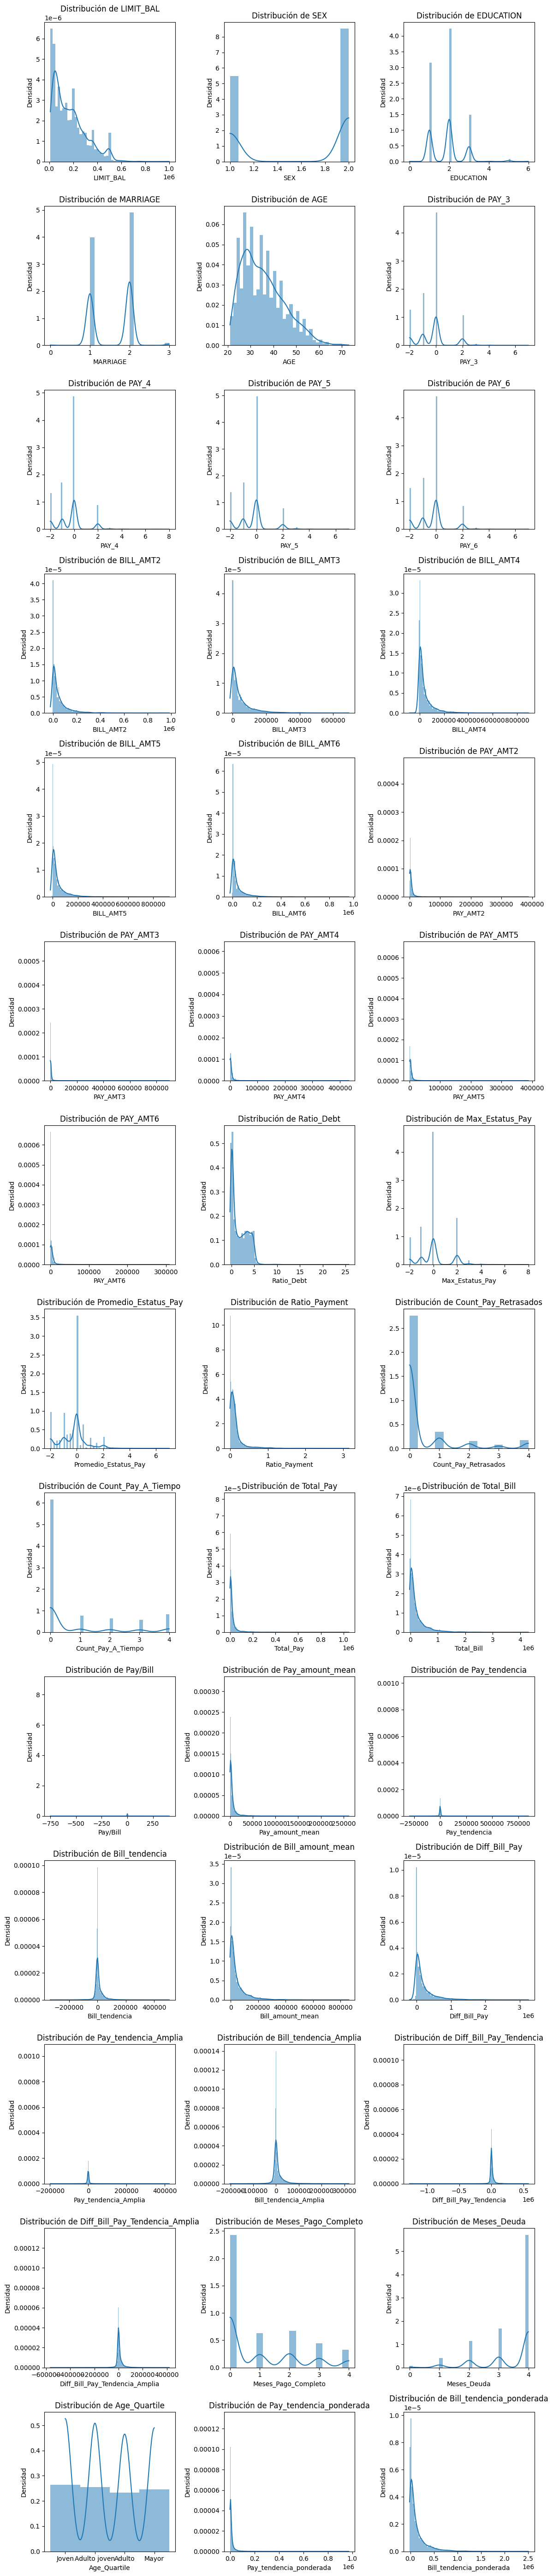

In [3445]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

In [3446]:
lst_column_log = ['LIMIT_BAL','AGE','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                  'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Ratio_Debt','Ratio_Payment','Total_Pay','Total_Bill',
                  'Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Pay_tendencia_ponderada','Bill_tendencia_ponderada']

In [3447]:
df.columns

Index(['CUSTOMER_ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Ratio_Debt', 'Max_Estatus_Pay',
       'Promedio_Estatus_Pay', 'Ratio_Payment', 'Count_Pay_Retrasados',
       'Count_Pay_A_Tiempo', 'Total_Pay', 'Total_Bill', 'Pay/Bill',
       'Pay_amount_mean', 'Pay_tendencia', 'Bill_tendencia',
       'Bill_amount_mean', 'Diff_Bill_Pay', 'Pay_tendencia_Amplia',
       'Bill_tendencia_Amplia', 'Diff_Bill_Pay_Tendencia',
       'Diff_Bill_Pay_Tendencia_Amplia', 'Meses_Pago_Completo', 'Meses_Deuda',
       'Age_Quartile', 'Pay_tendencia_ponderada', 'Bill_tendencia_ponderada'],
      dtype='object')

In [3448]:
lst_column_log

['LIMIT_BAL',
 'AGE',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Ratio_Debt',
 'Ratio_Payment',
 'Total_Pay',
 'Total_Bill',
 'Pay_amount_mean',
 'Bill_amount_mean',
 'Diff_Bill_Pay',
 'Pay_tendencia_ponderada',
 'Bill_tendencia_ponderada']

In [3449]:
for col in lst_column_log:
    offset = abs(df[col].min()) + 1
    df[f'{col}_log'] = np.log1p(df[col] + offset)

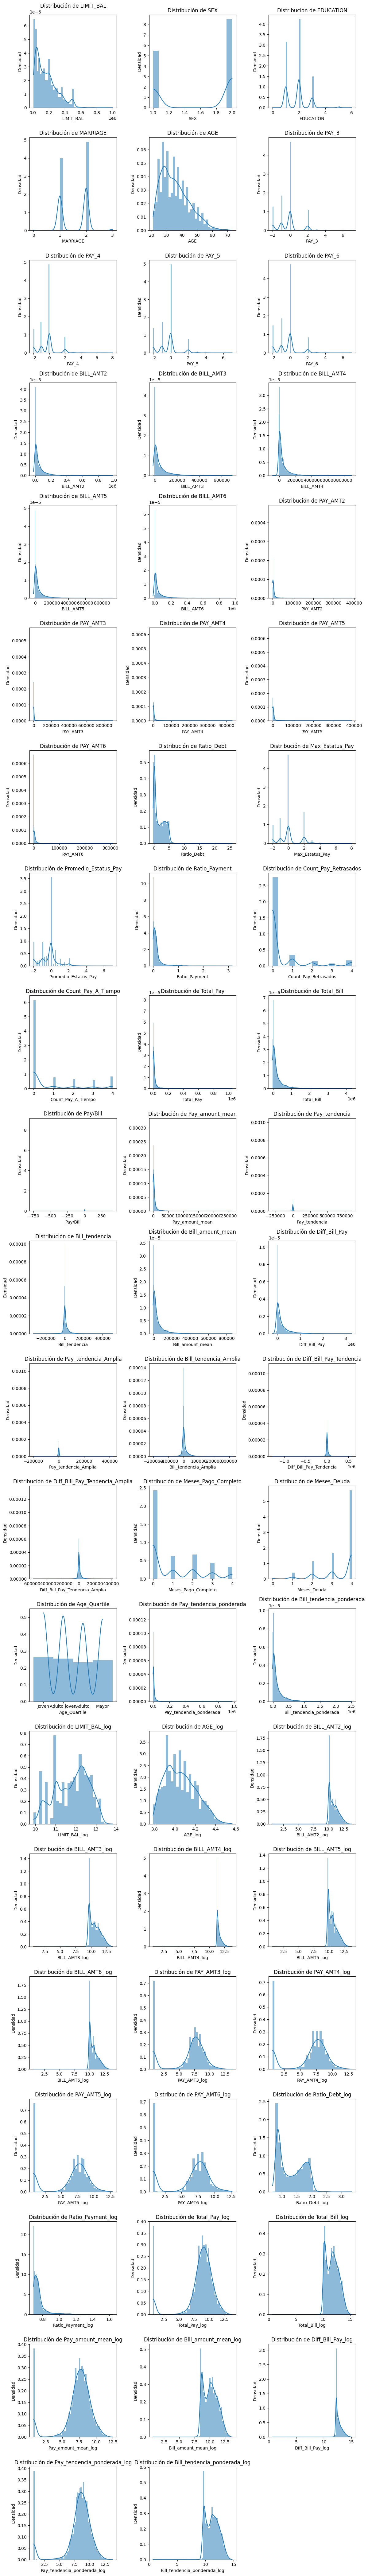

In [3450]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

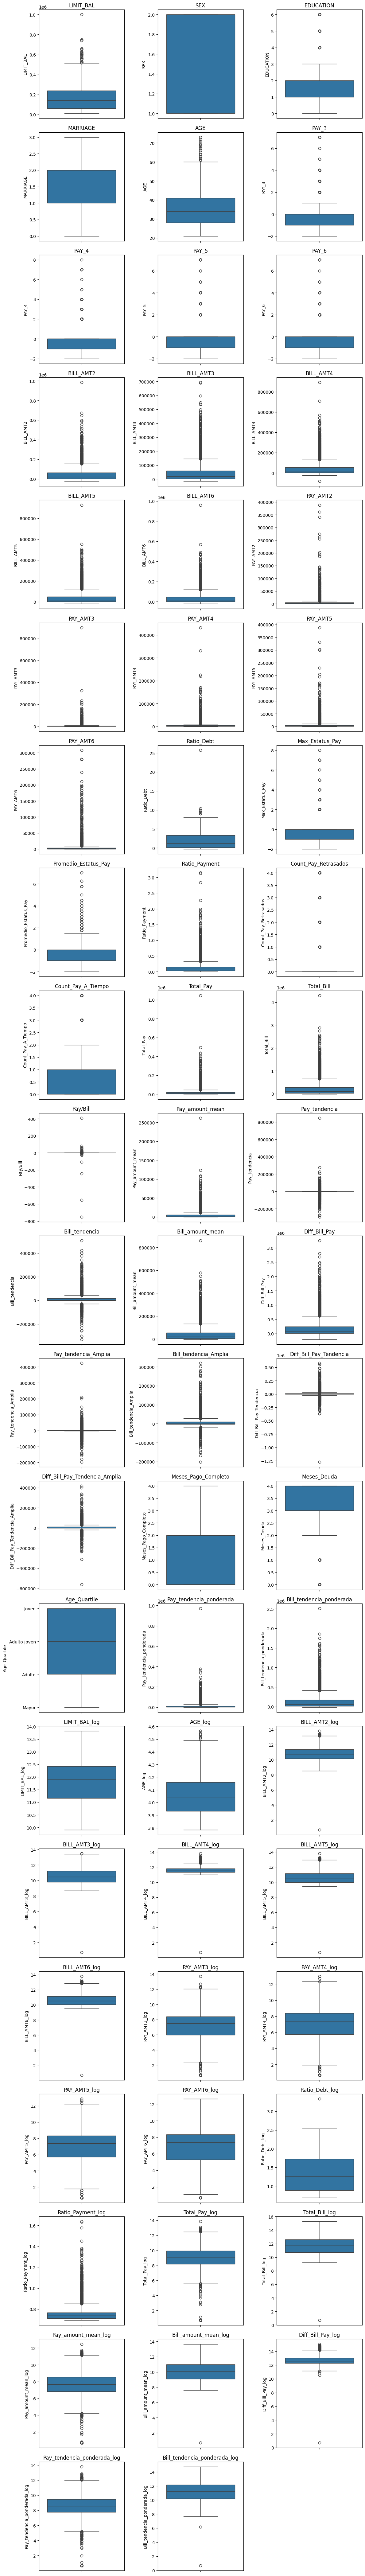

In [3451]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i) 
    sns.boxplot(y=df[var])  
    plt.title(var)  
plt.tight_layout()  
plt.show()


In [3452]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_3  PAY_4  \
0           24527   180000.0    1          1         2   29      0      0   
1           20750   210000.0    1          2         2   32      2      0   
2            3788   210000.0    1          2         1   39     -1     -1   
3           25888    90000.0    2          2         2   26      0      0   
4            5586   150000.0    2          2         1   44      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        25947    30000.0    2          3         2   24      2      2   
5621          576   220000.0    2          1         1   56     -2     -2   
5622         3432   150000.0    2          1         1   52      2      0   
5623         2049   480000.0    2          1         1   45     -1     -1   
5624        15877   200000.0    2          1         2   35     -1     -1   

      PAY_5  PAY_6  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0         0     -2   117488.0   118504.0   119034.0     -966.0     -966.0   
1         0      0   165227.0   161427.0   164860.0   187329.0   186079.0   
2        -1     -1     1443.0     1443.0     1443.0     1443.0     1443.0   
3         2      2    71353.0    72707.0    74101.0    72818.0    73940.0   
4         0      0    55504.0    22050.0    17360.0    17360.0    12000.0   
...     ...    ...        ...        ...        ...        ...        ...   
5620      2      3    14804.0    16546.0    15985.0    17869.0    17291.0   
5621     -1     -1        0.0        0.0        0.0     5889.0      300.0   
5622      0     -1     3227.0     1129.0     2034.0     2140.0     6731.0   
5623     -1     -1    10928.0      650.0     1597.0     3750.0     9429.0   
5624     -1     -1     2708.0     3514.0     2297.0      928.0        0.0   

      PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  \
0       4400.0    2500.0     937.0       0.0       0.0    1.961633   
1          0.0    5666.0   24886.0    6282.0    6494.0    4.118676   
2       1443.0    1443.0    1443.0    1443.0    1443.0    0.034357   
3       3168.0    3143.0    2700.0    3600.0    1700.0    4.054656   
4       1200.0       0.0       0.0       0.0       0.0    0.828493   
...        ...       ...       ...       ...       ...         ...   
5620    2300.0       0.0    2300.0       0.0       0.0    2.749833   
5621       0.0       0.0    5889.0     300.0     165.0    0.028132   
5622     802.0    1705.0    1806.0    6427.0      16.0    0.101740   
5623     650.0    1597.0    3750.0    9429.0    1000.0    0.054904   
5624    3514.0    2297.0     928.0       0.0    2308.0    0.047235   

      Max_Estatus_Pay  Promedio_Estatus_Pay  Ratio_Payment  \
0                   0                 -0.50       0.019094   
1                   2                  0.50       0.206324   
2                  -1                 -1.00       0.027486   
3                   2                  1.00       0.123811   
4                   0                  0.00       0.000000   
...               ...                   ...            ...   
5620                3                  2.25       0.076667   
5621               -1                 -1.50       0.028882   
5622                2                  0.25       0.066360   
5623               -1                 -1.00       0.032867   
5624               -1                 -1.00       0.027665   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Total_Pay  Total_Bill  \
0                        0                   0     3437.0    353094.0   
1                        1                   0    43328.0    864922.0   
2                        0                   4     5772.0      7215.0   
3                        2                   0    11143.0    364919.0   
4                        0                   0        0.0    124274.0   
...                    ...                 ...        ...         ...   
5620                     4                   0     2300.0  

In [3453]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

CUSTOMER_ID                       0
LIMIT_BAL                         0
SEX                               0
EDUCATION                         0
MARRIAGE                          0
AGE                               0
PAY_3                             0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT2                         0
BILL_AMT3                         0
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT2                          0
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
Ratio_Debt                        0
Max_Estatus_Pay                   0
Promedio_Estatus_Pay              0
Ratio_Payment                     0
Count_Pay_Retrasados              0
Count_Pay_A_Tiempo                0
Total_Pay                         0
Total_Bill                  

In [3454]:
pd.reset_option('display.max_rows')

In [3455]:
df.describe([0.01, 0.25, 0.5, 0.75, 0.99])

CUSTOMER_ID       LIMIT_BAL         SEX    EDUCATION     MARRIAGE  \
count   5625.000000     5625.000000  5625.00000  5625.000000  5625.000000   
mean   15032.204978   171011.555556     1.60800     1.853156     1.561956   
std     8692.201263   131481.021196     0.48824     0.783760     0.520671   
min        9.000000    10000.000000     1.00000     0.000000     0.000000   
1%       299.960000    10000.000000     1.00000     1.000000     1.000000   
25%     7528.000000    60000.000000     1.00000     1.000000     1.000000   
50%    15091.000000   140000.000000     2.00000     2.000000     2.000000   
75%    22635.000000   240000.000000     2.00000     2.000000     2.000000   
99%    29705.840000   500000.000000     2.00000     5.000000     2.000000   
max    30000.000000  1000000.000000     2.00000     6.000000     3.000000   

               AGE        PAY_3        PAY_4        PAY_5        PAY_6  \
count  5625.000000  5625.000000  5625.000000  5625.000000  5625.000000   
mean     35.468089    -0.209956    -0.244622    -0.282311    -0.311644   
std       9.194733     1.160566     1.153833     1.129402     1.139043   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
1%       22.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      41.000000     0.000000     0.000000     0.000000     0.000000   
99%      60.000000     3.000000     3.000000     3.000000     2.000000   
max      73.000000     7.000000     8.000000     7.000000     7.000000   

           BILL_AMT2      BILL_AMT3      BILL_AMT4      BILL_AMT5  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    49503.747733   47084.537067   43153.204267   40247.077867   
std     73970.203196   70371.056836   66621.933175   62785.884958   
min    -22960.000000  -14998.000000  -81334.000000  -19205.000000   
1%       -227.160000    -182.280000    -242.520000    -276.880000   
25%      2881.000000    2659.000000    2297.000000    1790.000000   
50%     20762.000000   19631.000000   18568.000000   17876.000000   
75%     63445.000000   60158.000000   54292.000000   49743.000000   
99%    368201.960000  332266.520000  319637.440000  294650.120000   
max    983931.000000  693131.000000  891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    38953.436800    5699.687467    5125.630933    4933.809244   
std     62045.689036   16185.192415   18182.144418   14756.853580   
min    -21364.000000       0.000000       0.000000       0.000000   
1%       -315.440000       0.000000       0.000000       0.000000   
25%      1362.000000    1000.000000     398.000000     316.000000   
50%     16745.000000    2070.000000    1823.000000    1605.000000   
75%     48376.000000    5008.000000    4500.000000    4385.000000   
99%    293901.800000   71200.920000   64242.120000   66996.960000   
max    961664.000000  388126.000000  896040.000000  432130.000000   

            PAY_AMT5       PAY_AMT6   Ratio_Debt  Max_Estatus_Pay  \
count    5625.000000    5625.000000  5625.000000      5625.000000   
mean     4948.330489    5400.883733     1.783685         0.095644   
std     15418.554999   17507.490173     1.773793         1.292592   
min         0.000000       0.000000    -0.301500        -2.000000   
1%          0.000000       0.000000     0.000000        -2.000000   
25%       302.000000     199.000000     0.127053        -1.000000   
50%      1600.000000    1582.000000     1.215040         0.000000   
75%      4183.000000    4095.000000     3.311160         0.000000   
99%     69329.440000   96620.240000     5.220406         3.000000   
max    388071.000000  308000.000000    25.730550         8.000000   

       Promedio_Estatus_Pay  Ratio_Payment  Count_Pay_Retrasados 

### Outiliers

In [3456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     5625 non-null   int64   
 1   LIMIT_BAL                       5625 non-null   float64 
 2   SEX                             5625 non-null   int64   
 3   EDUCATION                       5625 non-null   int64   
 4   MARRIAGE                        5625 non-null   int64   
 5   AGE                             5625 non-null   int64   
 6   PAY_3                           5625 non-null   int64   
 7   PAY_4                           5625 non-null   int64   
 8   PAY_5                           5625 non-null   int64   
 9   PAY_6                           5625 non-null   int64   
 10  BILL_AMT2                       5625 non-null   float64 
 11  BILL_AMT3                       5625 non-null   float64 
 12  BILL_AMT4           

In [3457]:
lst_out_upper = ['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
           'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Promedio_Estatus_Pay','Ratio_Payment','Total_Pay', 'Total_Bill',
                 'Pay/Bill','Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Ratio_Payment_log','Pay_tendencia_ponderada','Bill_tendencia_ponderada']
lst_out_both = ['Pay/Bill','Pay_tendencia','Bill_tendencia','Pay_tendencia_Amplia','Bill_tendencia_Amplia','Diff_Bill_Pay_Tendencia',
                'Diff_Bill_Pay_Tendencia_Amplia','BILL_AMT2_log','BILL_AMT3_log','BILL_AMT4_log','BILL_AMT5_log',
                'BILL_AMT6_log','PAY_AMT3_log','PAY_AMT4_log','PAY_AMT5_log','Total_Pay_log','Diff_Bill_Pay_log','Pay_tendencia_ponderada_log']
lst_out_lower = ['Total_Bill_log','Bill_amount_mean_log','Bill_tendencia_ponderada_log']

In [3458]:
for v in lst_out_upper: # Debido a la gran cantidad de outliers vistos en los boxplot, aplicamos winsorize parta no perder tantos datos
    df[v] = winsorize(df[v], limits = [0, 0.14])

for v in lst_out_both:
    df[v] = winsorize(df[v], limits = [0.14, 0.14])

for v in lst_out_lower:
    df[v] = winsorize(df[v], limits = [0.13, 0])


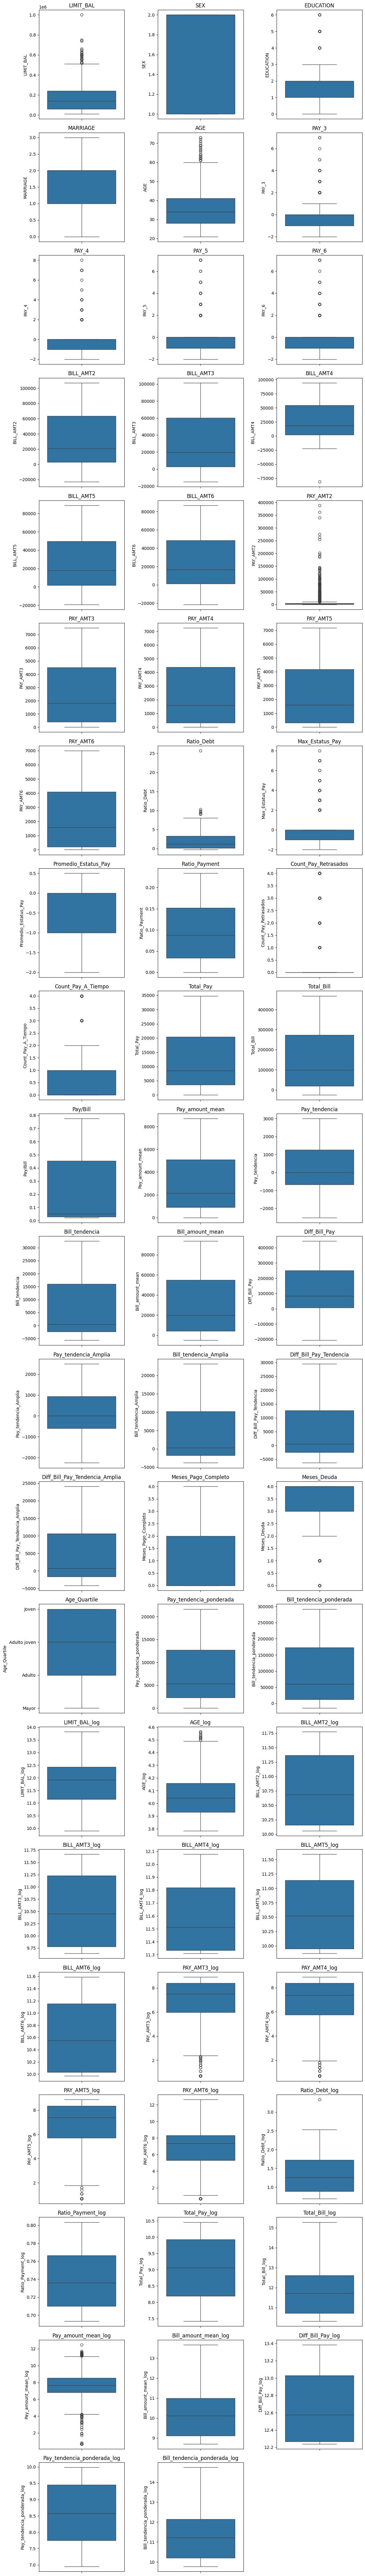

In [3459]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.boxplot(y=df[var])  
    plt.title(var)  
plt.tight_layout()  
plt.show()

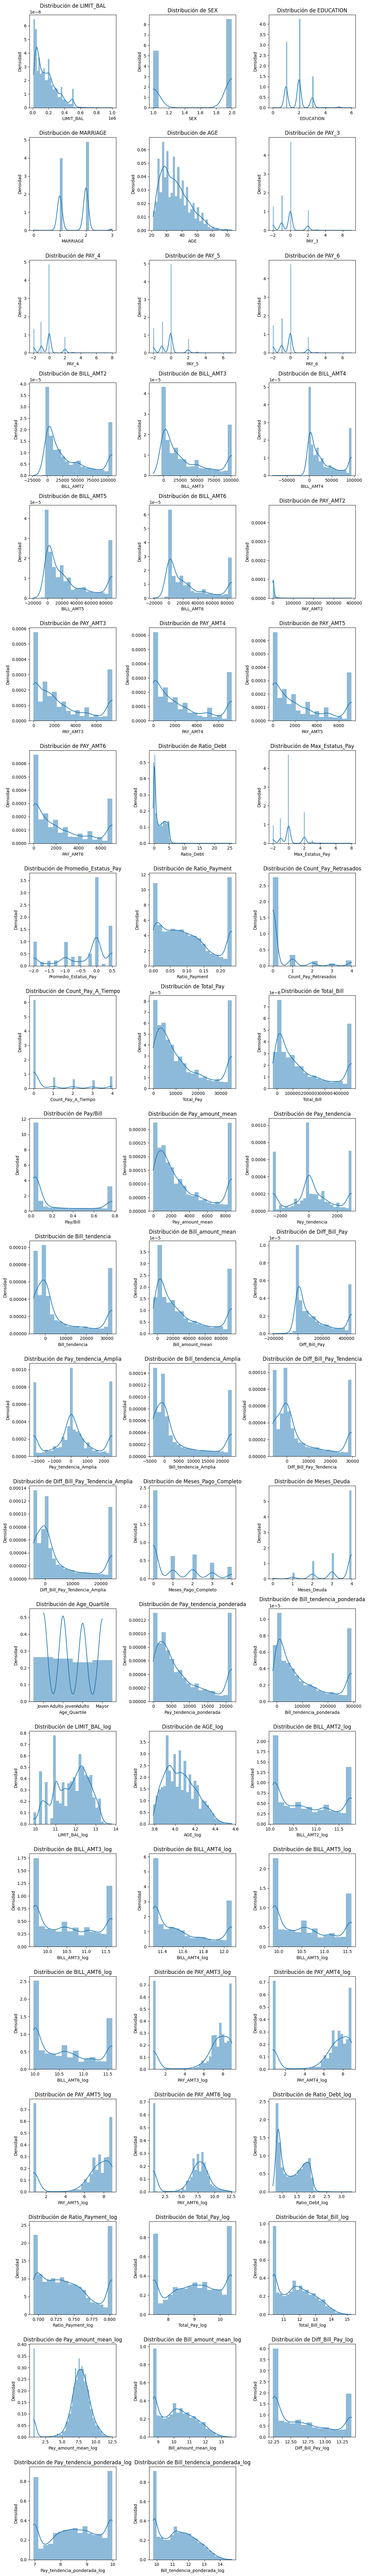

In [3460]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

### Codificacion

In [3461]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_3  PAY_4  \
0           24527   180000.0    1          1         2   29      0      0   
1           20750   210000.0    1          2         2   32      2      0   
2            3788   210000.0    1          2         1   39     -1     -1   
3           25888    90000.0    2          2         2   26      0      0   
4            5586   150000.0    2          2         1   44      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        25947    30000.0    2          3         2   24      2      2   
5621          576   220000.0    2          1         1   56     -2     -2   
5622         3432   150000.0    2          1         1   52      2      0   
5623         2049   480000.0    2          1         1   45     -1     -1   
5624        15877   200000.0    2          1         2   35     -1     -1   

      PAY_5  PAY_6  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0         0     -2   107034.0   101479.0    94419.0     -966.0     -966.0   
1         0      0   107034.0   101479.0    94419.0    88833.0    86703.0   
2        -1     -1     1443.0     1443.0     1443.0     1443.0     1443.0   
3         2      2    71353.0    72707.0    74101.0    72818.0    73940.0   
4         0      0    55504.0    22050.0    17360.0    17360.0    12000.0   
...     ...    ...        ...        ...        ...        ...        ...   
5620      2      3    14804.0    16546.0    15985.0    17869.0    17291.0   
5621     -1     -1        0.0        0.0        0.0     5889.0      300.0   
5622      0     -1     3227.0     1129.0     2034.0     2140.0     6731.0   
5623     -1     -1    10928.0      650.0     1597.0     3750.0     9429.0   
5624     -1     -1     2708.0     3514.0     2297.0      928.0        0.0   

      PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  \
0       4400.0    2500.0     937.0       0.0       0.0    1.961633   
1          0.0    5666.0    7240.0    6282.0    6494.0    4.118676   
2       1443.0    1443.0    1443.0    1443.0    1443.0    0.034357   
3       3168.0    3143.0    2700.0    3600.0    1700.0    4.054656   
4       1200.0       0.0       0.0       0.0       0.0    0.828493   
...        ...       ...       ...       ...       ...         ...   
5620    2300.0       0.0    2300.0       0.0       0.0    2.749833   
5621       0.0       0.0    5889.0     300.0     165.0    0.028132   
5622     802.0    1705.0    1806.0    6427.0      16.0    0.101740   
5623     650.0    1597.0    3750.0    7161.0    1000.0    0.054904   
5624    3514.0    2297.0     928.0       0.0    2308.0    0.047235   

      Max_Estatus_Pay  Promedio_Estatus_Pay  Ratio_Payment  \
0                   0                 -0.50       0.019094   
1                   2                  0.50       0.206324   
2                  -1                 -1.00       0.027486   
3                   2                  0.50       0.123811   
4                   0                  0.00       0.000000   
...               ...                   ...            ...   
5620                3                  0.50       0.076667   
5621               -1                 -1.50       0.028882   
5622                2                  0.25       0.066360   
5623               -1                 -1.00       0.032867   
5624               -1                 -1.00       0.027665   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Total_Pay  Total_Bill  \
0                        0                   0     3437.0    353094.0   
1                        1                   0    34810.0    467842.0   
2                        0                   4     5772.0      7215.0   
3                        2                   0    11143.0    364919.0   
4                        0                   0        0.0    124274.0   
...                    ...                 ...        ...         ...   
5620                     4                   0     2300.0  

In [3462]:
df['Age_Quartile'].unique()

['Adulto joven', 'Adulto', 'Joven', 'Mayor']
Categories (4, object): ['Joven' < 'Adulto joven' < 'Adulto' < 'Mayor']

In [3463]:
df = pd.get_dummies(df, columns = ['EDUCATION'],prefix='EDUCATION') # Codificamos las variables para el modelo
df = pd.get_dummies(df, columns = ['MARRIAGE'],prefix='MARRIAGE')
mapeo_Age = {'Joven':1, 'Adulto joven' :2, 'Adulto':3, 'Mayor':4}
df['Age_Quartile'] = df['Age_Quartile'].map(mapeo_Age)

In [3464]:
aux = df.drop(columns = ['PAY_AMT2'])
cod_columns = aux.columns

In [3465]:
cod_columns

Index(['CUSTOMER_ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Ratio_Debt', 'Max_Estatus_Pay', 'Promedio_Estatus_Pay',
       'Ratio_Payment', 'Count_Pay_Retrasados', 'Count_Pay_A_Tiempo',
       'Total_Pay', 'Total_Bill', 'Pay/Bill', 'Pay_amount_mean',
       'Pay_tendencia', 'Bill_tendencia', 'Bill_amount_mean', 'Diff_Bill_Pay',
       'Pay_tendencia_Amplia', 'Bill_tendencia_Amplia',
       'Diff_Bill_Pay_Tendencia', 'Diff_Bill_Pay_Tendencia_Amplia',
       'Meses_Pago_Completo', 'Meses_Deuda', 'Age_Quartile',
       'Pay_tendencia_ponderada', 'Bill_tendencia_ponderada', 'LIMIT_BAL_log',
       'AGE_log', 'BILL_AMT2_log', 'BILL_AMT3_log', 'BILL_AMT4_log',
       'BILL_AMT5_log', 'BILL_AMT6_log', 'PAY_AMT3_log', 'PAY_AMT4_log',
       'PAY_AMT5_log', 'PAY_AMT6_log', 'Ratio_Debt_log', 'Ratio_Payment_log',
       'Total_Pay_log', 'T

In [3466]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  AGE  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT2  \
0           24527   180000.0    1   29      0      0      0     -2   107034.0   
1           20750   210000.0    1   32      2      0      0      0   107034.0   
2            3788   210000.0    1   39     -1     -1     -1     -1     1443.0   
3           25888    90000.0    2   26      0      0      2      2    71353.0   
4            5586   150000.0    2   44      0      0      0      0    55504.0   
...           ...        ...  ...  ...    ...    ...    ...    ...        ...   
5620        25947    30000.0    2   24      2      2      2      3    14804.0   
5621          576   220000.0    2   56     -2     -2     -1     -1        0.0   
5622         3432   150000.0    2   52      2      0      0     -1     3227.0   
5623         2049   480000.0    2   45     -1     -1     -1     -1    10928.0   
5624        15877   200000.0    2   35     -1     -1     -1     -1     2708.0   

      BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT2  PAY_AMT3  \
0      101479.0    94419.0     -966.0     -966.0    4400.0    2500.0   
1      101479.0    94419.0    88833.0    86703.0       0.0    5666.0   
2        1443.0     1443.0     1443.0     1443.0    1443.0    1443.0   
3       72707.0    74101.0    72818.0    73940.0    3168.0    3143.0   
4       22050.0    17360.0    17360.0    12000.0    1200.0       0.0   
...         ...        ...        ...        ...       ...       ...   
5620    16546.0    15985.0    17869.0    17291.0    2300.0       0.0   
5621        0.0        0.0     5889.0      300.0       0.0       0.0   
5622     1129.0     2034.0     2140.0     6731.0     802.0    1705.0   
5623      650.0     1597.0     3750.0     9429.0     650.0    1597.0   
5624     3514.0     2297.0      928.0        0.0    3514.0    2297.0   

      PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  Max_Estatus_Pay  \
0        937.0       0.0       0.0    1.961633                0   
1       7240.0    6282.0    6494.0    4.118676                2   
2       1443.0    1443.0    1443.0    0.034357               -1   
3       2700.0    3600.0    1700.0    4.054656                2   
4          0.0       0.0       0.0    0.828493                0   
...        ...       ...       ...         ...              ...   
5620    2300.0       0.0       0.0    2.749833                3   
5621    5889.0     300.0     165.0    0.028132               -1   
5622    1806.0    6427.0      16.0    0.101740                2   
5623    3750.0    7161.0    1000.0    0.054904               -1   
5624     928.0       0.0    2308.0    0.047235               -1   

      Promedio_Estatus_Pay  Ratio_Payment  Count_Pay_Retrasados  \
0                    -0.50       0.019094                     0   
1                     0.50       0.206324                     1   
2                    -1.00       0.027486                     0   
3                     0.50       0.123811                     2   
4                     0.00       0.000000                     0   
...                    ...            ...                   ...   
5620                  0.50       0.076667                     4   
5621                 -1.50       0.028882                     0   
5622                  0.25       0.066360                     1   
5623                 -1.00       0.032867                     0   
5624                 -1.00       0.027665                     0   

      Count_Pay_A_Tiempo  Total_Pay  Total_Bill  Pay/Bill  Pay_amount_mean  \
0                      0     3437.0    353094.0  0.022297           859.25   
1                      0    34810.0    467842.0  0.050095          8702.50   
2                      4     5772.0      7215.0  0.775809          1443.00   
3                      0    11143.0    364919.0  0.030536          2785.75   
4                      0        0.0    124274.0  0.022297             0.00   
...                  ...        ...         ...       ...              ...   
5620        

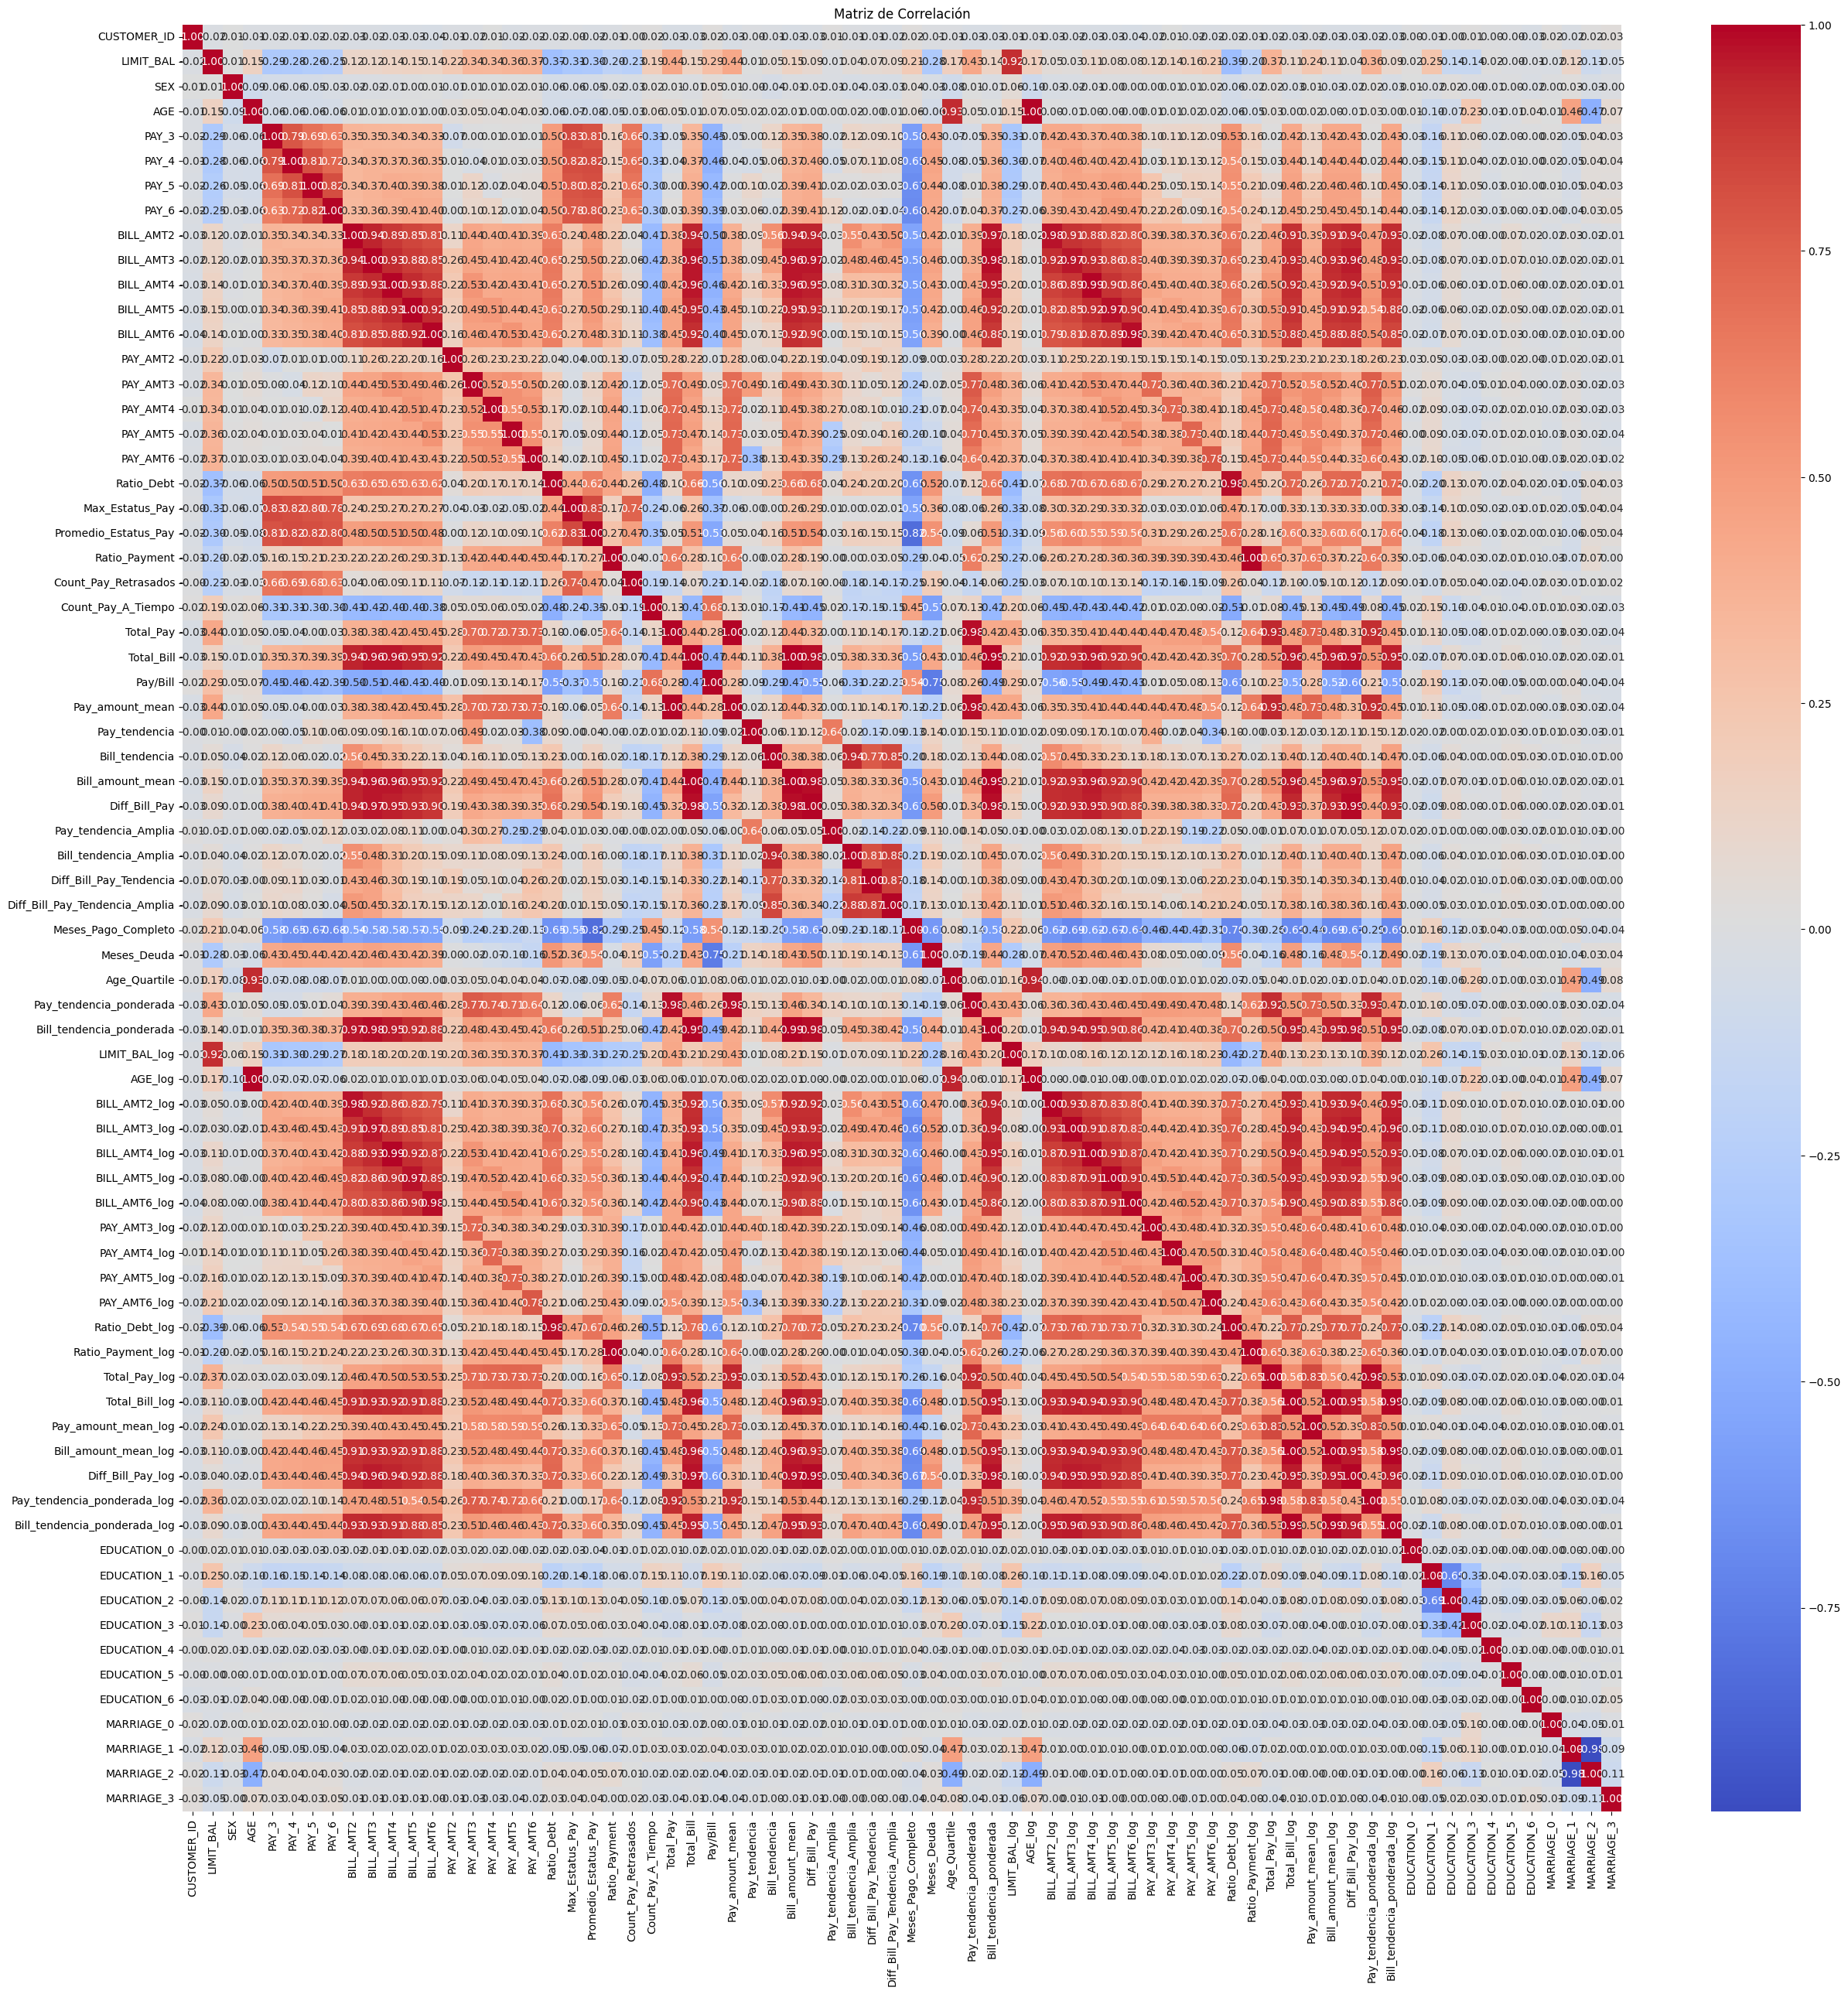

In [3467]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix["PAY_AMT2"].sort_values(ascending=False)
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [3468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     5625 non-null   int64   
 1   LIMIT_BAL                       5625 non-null   float64 
 2   SEX                             5625 non-null   int64   
 3   AGE                             5625 non-null   int64   
 4   PAY_3                           5625 non-null   int64   
 5   PAY_4                           5625 non-null   int64   
 6   PAY_5                           5625 non-null   int64   
 7   PAY_6                           5625 non-null   int64   
 8   BILL_AMT2                       5625 non-null   float64 
 9   BILL_AMT3                       5625 non-null   float64 
 10  BILL_AMT4                       5625 non-null   float64 
 11  BILL_AMT5                       5625 non-null   float64 
 12  BILL_AMT6           

In [3469]:
numeric_columns = df.select_dtypes(include = ['float64']).columns

In [3470]:
numeric_columns

Index(['LIMIT_BAL', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Ratio_Debt', 'Promedio_Estatus_Pay', 'Ratio_Payment', 'Total_Pay',
       'Total_Bill', 'Pay/Bill', 'Pay_amount_mean', 'Pay_tendencia',
       'Bill_tendencia', 'Bill_amount_mean', 'Diff_Bill_Pay',
       'Pay_tendencia_Amplia', 'Bill_tendencia_Amplia',
       'Diff_Bill_Pay_Tendencia', 'Diff_Bill_Pay_Tendencia_Amplia',
       'Pay_tendencia_ponderada', 'Bill_tendencia_ponderada', 'LIMIT_BAL_log',
       'AGE_log', 'BILL_AMT2_log', 'BILL_AMT3_log', 'BILL_AMT4_log',
       'BILL_AMT5_log', 'BILL_AMT6_log', 'PAY_AMT3_log', 'PAY_AMT4_log',
       'PAY_AMT5_log', 'PAY_AMT6_log', 'Ratio_Debt_log', 'Ratio_Payment_log',
       'Total_Pay_log', 'Total_Bill_log', 'Pay_amount_mean_log',
       'Bill_amount_mean_log', 'Diff_Bill_Pay_log',
       'Pay_tendencia_ponderada_log', 'Bill_tendencia_ponderada_log'],
      dtype='object')

In [3471]:
len(numeric_columns)

48

In [3472]:
numeric_columns = [col for col in numeric_columns if col != 'PAY_AMT2']

In [3473]:
numeric_columns

['LIMIT_BAL',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Ratio_Debt',
 'Promedio_Estatus_Pay',
 'Ratio_Payment',
 'Total_Pay',
 'Total_Bill',
 'Pay/Bill',
 'Pay_amount_mean',
 'Pay_tendencia',
 'Bill_tendencia',
 'Bill_amount_mean',
 'Diff_Bill_Pay',
 'Pay_tendencia_Amplia',
 'Bill_tendencia_Amplia',
 'Diff_Bill_Pay_Tendencia',
 'Diff_Bill_Pay_Tendencia_Amplia',
 'Pay_tendencia_ponderada',
 'Bill_tendencia_ponderada',
 'LIMIT_BAL_log',
 'AGE_log',
 'BILL_AMT2_log',
 'BILL_AMT3_log',
 'BILL_AMT4_log',
 'BILL_AMT5_log',
 'BILL_AMT6_log',
 'PAY_AMT3_log',
 'PAY_AMT4_log',
 'PAY_AMT5_log',
 'PAY_AMT6_log',
 'Ratio_Debt_log',
 'Ratio_Payment_log',
 'Total_Pay_log',
 'Total_Bill_log',
 'Pay_amount_mean_log',
 'Bill_amount_mean_log',
 'Diff_Bill_Pay_log',
 'Pay_tendencia_ponderada_log',
 'Bill_tendencia_ponderada_log']

In [3474]:
categorical_columns = df.select_dtypes(exclude = ['float64']).columns

In [3475]:
categorical_columns

Index(['CUSTOMER_ID', 'SEX', 'AGE', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'Max_Estatus_Pay', 'Count_Pay_Retrasados', 'Count_Pay_A_Tiempo',
       'Meses_Pago_Completo', 'Meses_Deuda', 'Age_Quartile', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [3476]:
sc = StandardScaler()
y = df['PAY_AMT2']
df_scaled = sc.fit_transform(df[numeric_columns])
df_scaled = pd.DataFrame(df_scaled, columns = numeric_columns)

In [3477]:
df_scaled.describe() # Comprobamos que se aplico standar_scaler correctamente

LIMIT_BAL     BILL_AMT2     BILL_AMT3     BILL_AMT4    BILL_AMT5  \
count  5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03  5625.000000   
mean  -4.926430e-17 -8.084397e-17 -8.842310e-17 -5.558023e-17     0.000000   
std    1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00     1.000089   
min   -1.224708e+00 -1.556042e+00 -1.364710e+00 -3.336639e+00    -1.532122   
25%   -8.443913e-01 -8.839380e-01 -8.813785e-01 -8.702099e-01    -0.872050   
50%   -2.358843e-01 -4.188676e-01 -4.167976e-01 -3.903487e-01    -0.366316   
75%    5.247493e-01  6.912828e-01  6.925631e-01  6.632166e-01     0.635565   
max    6.305565e+00  1.824997e+00  1.823658e+00  1.846634e+00     1.864533   

          BILL_AMT6      PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6  \
count  5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03   
mean  -6.063298e-17  4.736952e-18  5.684342e-17 -5.052748e-17 -3.789561e-18   
std    1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00   
min   -1.592564e+00 -1.024279e+00 -9.890062e-01 -9.927266e-01 -9.851214e-01   
25%   -8.640900e-01 -8.721103e-01 -8.657732e-01 -8.732083e-01 -9.049243e-01   
50%   -3.709932e-01 -3.272852e-01 -3.630915e-01 -3.595171e-01 -3.475740e-01   
75%    6.429277e-01  6.962212e-01  7.210474e-01  6.627205e-01  6.651673e-01   
max    1.871487e+00  1.843221e+00  1.834435e+00  1.841282e+00  1.835885e+00   

         Ratio_Debt  Promedio_Estatus_Pay  Ratio_Payment     Total_Pay  \
count  5.625000e+03          5.625000e+03   5.625000e+03  5.625000e+03   
mean   5.810661e-17          4.357995e-17  -1.364242e-16  1.957940e-17   
std    1.000089e+00          1.000089e+00   1.000089e+00  1.000089e+00   
min   -1.175656e+00         -2.057508e+00  -1.311297e+00 -1.102288e+00   
25%   -9.340321e-01         -7.777863e-01  -8.681517e-01 -7.967522e-01   
50%   -3.206101e-01          5.019352e-01  -1.722638e-01 -3.759613e-01   
75%    8.612115e-01          5.019352e-01   6.611278e-01  6.290822e-01   
max    1.350157e+01          1.141796e+00   1.722831e+00  1.852075e+00   

         Total_Bill      Pay/Bill  Pay_amount_mean  Pay_tendencia  \
count  5.625000e+03  5.625000e+03     5.625000e+03   5.625000e+03   
mean   7.579123e-18 -2.400055e-17     1.957940e-17  -1.705303e-17   
std    1.000089e+00  1.000089e+00     1.000089e+00   1.000089e+00   
min   -1.139061e+00 -7.480955e-01    -1.102288e+00  -1.617991e+00   
25%   -8.647732e-01 -7.254464e-01    -7.967522e-01  -5.362671e-01   
50%   -3.937788e-01 -6.434077e-01    -3.759613e-01  -1.419501e-01   
75%    6.666303e-01  7.497098e-01     6.290822e-01   5.978358e-01   
max    1.837731e+00  1.874790e+00     1.852075e+00   1.623649e+00   

       Bill_tendencia  Bill_amount_mean  Diff_Bill_Pay  Pay_tendencia_Amplia  \
count    5.625000e+03      5.625000e+03   5.625000e+03          5.625000e+03   
mean    -1.768462e-17      8.084397e-17  -7.200166e-17          1.389506e-17   
std      1.000089e+00      1.000089e+00   1.000089e+00          1.000089e+00   
min     -9.667067e-01     -1.139061e+00  -2.179328e+00         -1.637166e+00   
25%     -7.192209e-01     -8.647732e-01  -8.614732e-01         -4.929108e-01   
50%     -5.072921e-01     -3.937788e-01  -3.843485e-01         -8.267372e-02   
75%      6.475674e-01      6.666303e-01   6.479353e-01          5.628210e-01   
max      1.874880e+00      1.837731e+00   1.845609e+00          1.639564e+00   

       Bill_tendencia_Amplia  Diff_Bill_Pay_Tendencia  \
count           5.625000e+03             5.625000e+03   
mean           -4.168517e-17            -2.021099e-17   
std             1.000089e+00             1.000089e+00   
min            -9.330210e-01            -1.015641e+00   
25%            -7.184750e-01            -6.995599e-01   
50%            -4.949449e-01            -4.520312e-01   
75%             5.502158e-01             5.368523e-01   
max             1.918842e+00             1.930402e+00   

       Diff_Bill_Pay_Tendencia_Amplia  Pay_tendencia_ponderada  \
count

In [3478]:
df_categorical = df[categorical_columns]

In [3479]:
df_categorical

CUSTOMER_ID  SEX  AGE  PAY_3  PAY_4  PAY_5  PAY_6  Max_Estatus_Pay  \
0           24527    1   29      0      0      0     -2                0   
1           20750    1   32      2      0      0      0                2   
2            3788    1   39     -1     -1     -1     -1               -1   
3           25888    2   26      0      0      2      2                2   
4            5586    2   44      0      0      0      0                0   
...           ...  ...  ...    ...    ...    ...    ...              ...   
5620        25947    2   24      2      2      2      3                3   
5621          576    2   56     -2     -2     -1     -1               -1   
5622         3432    2   52      2      0      0     -1                2   
5623         2049    2   45     -1     -1     -1     -1               -1   
5624        15877    2   35     -1     -1     -1     -1               -1   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Meses_Pago_Completo  \
0                        0                   0                    2   
1                        1                   0                    0   
2                        0                   4                    4   
3                        2                   0                    0   
4                        0                   0                    0   
...                    ...                 ...                  ...   
5620                     4                   0                    0   
5621                     0                   2                    2   
5622                     1                   1                    2   
5623                     0                   4                    3   
5624                     0                   4                    1   

      Meses_Deuda Age_Quartile  EDUCATION_0  EDUCATION_1  EDUCATION_2  \
0               2            2        False         True        False   
1               4            2        False        False         True   
2               4            3        False        False         True   
3               4            1        False        False         True   
4               4            4        False        False         True   
...           ...          ...          ...          ...          ...   
5620            4            1        False        False        False   
5621            3            4        False         True        False   
5622            2            4        False         True        False   
5623            1            4        False         True        False   
5624            3            3        False         True        False   

      EDUCATION_3  EDUCATION_4  EDUCATION_5  EDUCATION_6  MARRIAGE_0  \
0           False        False        False        False       False   
1           False        False        False        False       False   
2           False        False        False        False       False   
3           False        False        False        False       False   
4           False        False        False        False       False   
...           ...          ...          ...          ...         ...   
5620         True        False        False        False       False   
5621        False        False        False        False       False   
5622        False        False        False        False       False   
5623        False        False        False        False       False   
5624        False        False        False        False       False   

      MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0          False        True       False  
1          False        True       False  
2           True       False       False  
3          False        True       False  
4           True       False       False  
...          ...         ...         ...  
5620       False        True       False  
5621        True       False       False  
5622        True       False       False  
5623        True       False       False  
5624       False        T

### Modelo sin PCA

In [3480]:
df_sin_PCA = pd.concat([df_scaled, df_categorical.reset_index(drop=True)], axis=1)

In [3481]:
pd.set_option('display.max_rows', None)
df_sin_PCA.isnull().sum()

LIMIT_BAL                         0
BILL_AMT2                         0
BILL_AMT3                         0
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
Ratio_Debt                        0
Promedio_Estatus_Pay              0
Ratio_Payment                     0
Total_Pay                         0
Total_Bill                        0
Pay/Bill                          0
Pay_amount_mean                   0
Pay_tendencia                     0
Bill_tendencia                    0
Bill_amount_mean                  0
Diff_Bill_Pay                     0
Pay_tendencia_Amplia              0
Bill_tendencia_Amplia             0
Diff_Bill_Pay_Tendencia           0
Diff_Bill_Pay_Tendencia_Amplia    0
Pay_tendencia_ponderada           0
Bill_tendencia_ponderada          0
LIMIT_BAL_log               

In [3482]:
pd.reset_option('display.max_rows')

In [3483]:
X = df_sin_PCA.drop(columns = ['CUSTOMER_ID'])

In [3484]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3485]:
X_train

LIMIT_BAL  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
2758   1.741763  -0.685254  -0.787926  -0.684588  -0.720481  -0.360255   
5465  -0.920455  -0.842583  -0.801695  -0.741065  -0.763742  -0.788249   
4016  -0.920455  -0.923498  -0.931937  -0.819631  -0.026895   0.017830   
3857  -0.540138   0.410357   0.548771   0.776495   0.964233   0.990721   
706    1.057193   1.272692   1.823658   1.428382   1.417904   0.760921   
...         ...        ...        ...        ...        ...        ...   
3772  -0.768328  -0.048315  -0.370920  -0.677245  -0.672693  -0.666217   
5191  -0.083758   1.824997   1.823658   1.846634   1.864533   1.871487   
5226  -0.920455  -0.663380  -0.954164  -0.937953  -0.928327  -0.907748   
5390   0.372623  -0.701900  -0.665594  -0.616403  -0.583091  -0.589414   
860    1.589636   1.824997   1.823658   1.846634   1.864533   1.871487   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  \
2758  1.843221 -0.989006  1.841282 -0.985121   -0.936776   
5465 -0.524187 -0.989006 -0.794849 -0.582121   -0.716092   
4016  0.543288  1.834435 -0.592617 -0.565597   -0.287018   
3857  0.505054  0.180928 -0.992727  0.747782    0.601795   
706   1.843221  1.350862  0.986053  1.029883   -0.285114   
...        ...       ...       ...       ...         ...   
3772 -0.833112 -0.599028 -0.596971 -0.380620   -0.354687   
5191  1.843221  0.960884  0.986053  0.828383    1.388569   
5226 -1.024279 -0.989006 -0.992727 -0.985121   -0.877557   
5390 -0.830054 -0.843154 -0.840756 -0.578897   -0.871794   
860   1.843221  1.834435  1.841282  1.835885    1.853719   

      Promedio_Estatus_Pay  Ratio_Payment  Total_Pay  Total_Bill  Pay/Bill  \
2758              0.821866      -0.674929   0.559573   -0.691928  0.568851   
5465              1.141796      -0.581234  -0.863970   -0.831976 -0.445089   
4016              0.501935       1.722831   1.852075   -0.602229  1.083311   
3857              1.141796       0.157668  -0.143245    0.734393 -0.687746   
706               0.501935      -0.221000   1.104360    1.405041 -0.597270   
...                    ...            ...        ...         ...       ...   
3772              0.501935      -0.568457  -0.762804   -0.499037 -0.653435   
5191              0.501935       1.722831   1.852075    1.837731 -0.597728   
5226             -1.737577      -1.311297  -1.102288   -0.918432 -0.748096   
5390              0.501935      -1.176927  -0.909291   -0.671628 -0.674178   
860               1.141796       0.641667   1.852075    1.837731 -0.722596   

      Pay_amount_mean  Pay_tendencia  Bill_tendencia  Bill_amount_mean  \
2758         0.559573       1.623649       -0.966707         -0.691928   
5465        -0.863970       0.039318       -0.489290         -0.831976   
4016         1.852075       1.623649       -0.966707         -0.602229   
3857        -0.143245      -0.318510       -0.966707          0.734393   
706          1.104360       1.623649        1.874880          1.405041   
...               ...            ...             ...               ...   
3772        -0.762804      -0.730483        1.499151         -0.499037   
5191         1.852075       1.623649        1.763225          1.837731   
5226        -1.102288      -0.141950        0.300552         -0.918432   
5390        -0.909291      -0.436217       -0.548354         -0.671628   
860          1.852075      -0.187267        1.149978          1.837731   

      Diff_Bill_Pay  Pay_tendencia_Amplia  Bill_tendencia_Amplia  \
2758      -0.718548             -0.909003              -0.791229   
5465      -0.758346             -0.148808              -0.551122   
4016      -0.721740              1.639564              -0.933021   
3857       0.796723              0.847335              -0.933021   
706        1.393967              1.639564               1.918842   
...             ...                   ...                    ...   
3772      -0.424010             -0.427121               1.582023   
5191       1.845609       

In [3486]:
model_lin = LinearRegression()

In [3487]:
model_lin.fit(X_train,y_train)

LinearRegression()

In [3488]:
cv_scores = cross_val_score(model_lin, X_train, y_train, cv=5, scoring='r2')

In [3489]:
print(cv_scores)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.35684099 0.47423236 0.30539635 0.24327192 0.38269422]
r2: 0.35 (+/- 0.15)


In [3490]:
y_pred = model_lin.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.4708734944945877


### Modelo con PCA

In [3491]:
pca = PCA(n_components = 47)
X_PCA = pca.fit_transform(df_scaled)

In [3492]:
X_PCA

array([[ 2.50385256e+00, -4.81300120e+00,  3.65567054e+00, ...,
        -2.48446087e-05, -4.04094535e-14, -2.89881898e-14],
       [ 8.97060749e+00,  1.56568317e+00, -2.52221674e+00, ...,
         2.44090764e-06, -4.15330447e-14, -1.53310639e-14],
       [-4.77900387e+00,  1.70524232e+00,  5.57270657e-01, ...,
         9.91719204e-06, -2.70718254e-15, -1.02168539e-14],
       ...,
       [-3.80544774e+00,  2.18537644e+00, -6.31353038e-01, ...,
         4.35918710e-06,  5.36687421e-14,  1.50453695e-14],
       [-2.83888764e+00,  3.74689889e+00,  1.41846095e+00, ...,
        -9.80196396e-06, -8.92538316e-14, -3.20132097e-14],
       [-4.81037386e+00,  1.03050797e+00,  8.99784453e-01, ...,
         8.04691021e-06, -2.82875837e-14, -1.51527801e-14]])

In [3493]:
y

0       4400.0
1          0.0
2       1443.0
3       3168.0
4       1200.0
         ...  
5620    2300.0
5621       0.0
5622     802.0
5623     650.0
5624    3514.0
Name: PAY_AMT2, Length: 5625, dtype: float64

In [3494]:
df_pca = pd.DataFrame(X_PCA, columns=[f'PCA_{i+1}' for i in range(X_PCA.shape[1])])

In [3495]:
df_pca

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0     2.503853 -4.813001  3.655671  0.464381  3.109974  0.366818 -0.162519   
1     8.970607  1.565683 -2.522217  1.570902 -0.732489  1.151580 -1.073622   
2    -4.779004  1.705242  0.557271  0.691396 -0.308191 -0.196634  1.835198   
3     4.844024 -1.858313 -2.628322  1.069595 -0.528603 -0.368109  0.416949   
4    -2.705069 -4.872196  3.071428  0.313394  0.461080  0.182239 -1.776397   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -2.897433 -2.873565 -2.386505 -0.195238  0.133432  1.907976 -0.623499   
5621 -5.139181  1.820055  0.407942  1.651617  0.208318  2.273824  0.783801   
5622 -3.805448  2.185376 -0.631353  0.565668 -0.029711 -2.012836  1.383202   
5623 -2.838888  3.746899  1.418461  1.566720 -1.140737 -1.455715  1.342681   
5624 -4.810374  1.030508  0.899784  0.534958  0.272143  0.850505  1.101059   

         PCA_8     PCA_9    PCA_10    PCA_11    PCA_12    PCA_13    PCA_14  \
0    -0.811753 -0.418210 -0.602932  0.922099 -0.404892  0.931736  1.297294   
1    -0.270387 -0.148718  0.238484 -0.361488 -0.124155 -0.428894 -0.213174   
2     0.269094  0.028706 -0.879050  0.463652 -0.019202 -0.021713 -0.004661   
3    -0.984850  0.100542 -0.280308  0.294641 -0.002224 -0.026379 -0.007360   
4     0.947004  0.365371  1.091580 -0.218833 -0.469052 -1.111030  0.264843   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.924036  0.805666  1.027768  0.390055 -0.046284  0.471998  0.212170   
5621  2.014127  1.620839 -0.917601  0.937449  0.151783 -0.297203 -0.868870   
5622  1.430301  1.583074  0.740493  0.512390 -1.069300  0.502244  0.478506   
5623  0.645704  1.565231  0.508135 -0.242189  0.763026  0.102393  1.055191   
5624 -0.081324 -1.455974 -0.604050  0.223482 -0.197882  0.161133  0.639051   

        PCA_15    PCA_16    PCA_17    PCA_18    PCA_19    PCA_20    PCA_21  \
0     0.444189  0.397726 -2.390702 -0.120937 -0.848231 -0.624174 -0.795328   
1     0.316770 -0.856166 -0.557458  0.027836 -0.648605 -0.810037 -0.638738   
2     0.311932 -0.039533  0.019553 -0.058401  0.051481 -0.043061 -0.005694   
3    -0.025989  0.287688 -0.081349 -0.076837 -0.090117  0.207733  0.113931   
4     0.579482 -0.022342  0.503766  0.621893  0.290169 -0.016038 -0.056230   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.879066  0.557618 -0.104578 -0.137263  0.117599 -0.287984  0.016136   
5621  0.378207 -0.140232 -0.311136 -0.134340 -0.125142 -0.026235  0.263323   
5622  0.803399  0.392718  0.056157  0.276960 -0.056929  0.310566  0.394789   
5623  0.545397  0.373216  0.034676 -0.103466  0.048669  0.914020  0.239467   
5624  0.360652  0.476756  0.179621 -0.371351 -0.173978  0.198767  0.108842   

        PCA_22    PCA_23    PCA_24    PCA_25    PCA_26    PCA_27    PCA_28  \
0    -0.290558  0.713115  0.267307 -0.449110  0.253069 -0.341309 -0.564903   
1    -0.425733  0.171720 -0.336138 -0.337443 -0.150784  0.194862 -0.027752   
2    -0.334375 -0.272511 -0.111801 -0.078888 -0.054486 -0.091331  0.010984   
3    -0.268011 -0.132695 -0.030719 -0.098041 -0.133879 -0.061522  0.023322   
4     0.028229 -0.394588 -0.095993  0.105149 -0.679868 -1.108808  0.214724   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.666441  0.392331 -0.164401  0.150254 -0.009061  0.090526 -0.023159   
5621 -0.120853  0.103582  0.427055  0.249584 -0.073370  0.017150  0.034108   
5622 -0.530171 -0.035616 -0.322880 -0.223563 -0.112461 -0.033024 -0.008634   
5623 -0.699348  0.065414 -0.024048 -0.045901  0.056207  0.109371 -0.003897   
5624 -0.221547  0.195458 -0.360929  0.092622 -0.040068  0.053009 -0.032150   

        PCA_29    PCA_30    PCA_31    PCA_32    PCA_33    PCA_34    PCA_35  \
0    -0.003062 -0.334859 -0.224645 -0.012347  0.154702 -0.006436  0.123434   
1     0.366872  0.108373 -0.000501 -0.027457 -0.133341  0.084531  0.052980   
2     0.062179 -0.130337 -0

In [3496]:
k_best = SelectKBest(score_func=f_regression, k =15)

In [3497]:
X_selected = k_best.fit_transform(df_pca, y)

In [3498]:
X_selected

array([[ 2.50385256e+00, -4.81300120e+00,  3.65567054e+00, ...,
        -2.24644579e-01,  1.72441560e-02,  1.05761046e-02],
       [ 8.97060749e+00,  1.56568317e+00, -2.52221674e+00, ...,
        -5.00550135e-04,  3.08651780e-03, -1.65561839e-02],
       [-4.77900387e+00,  1.70524232e+00,  5.57270657e-01, ...,
        -6.11631675e-03, -1.75829620e-03,  3.14073649e-03],
       ...,
       [-3.80544774e+00,  2.18537644e+00, -6.31353038e-01, ...,
        -5.24054175e-02,  5.09788949e-02, -3.55821268e-03],
       [-2.83888764e+00,  3.74689889e+00,  1.41846095e+00, ...,
        -1.39133151e-01,  1.44150149e-01,  1.30439269e-02],
       [-4.81037386e+00,  1.03050797e+00,  8.99784453e-01, ...,
        -6.40908535e-03, -2.11481299e-02,  1.62091388e-02]])

In [3499]:
selected_features = df_pca.columns[k_best.get_support()]
df_selected = pd.DataFrame(X_selected, columns=selected_features)

In [3500]:
df_selected

PCA_1     PCA_2     PCA_3    PCA_13    PCA_14    PCA_15    PCA_19  \
0     2.503853 -4.813001  3.655671  0.931736  1.297294  0.444189 -0.848231   
1     8.970607  1.565683 -2.522217 -0.428894 -0.213174  0.316770 -0.648605   
2    -4.779004  1.705242  0.557271 -0.021713 -0.004661  0.311932  0.051481   
3     4.844024 -1.858313 -2.628322 -0.026379 -0.007360 -0.025989 -0.090117   
4    -2.705069 -4.872196  3.071428 -1.111030  0.264843  0.579482  0.290169   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -2.897433 -2.873565 -2.386505  0.471998  0.212170  0.879066  0.117599   
5621 -5.139181  1.820055  0.407942 -0.297203 -0.868870  0.378207 -0.125142   
5622 -3.805448  2.185376 -0.631353  0.502244  0.478506  0.803399 -0.056929   
5623 -2.838888  3.746899  1.418461  0.102393  1.055191  0.545397  0.048669   
5624 -4.810374  1.030508  0.899784  0.161133  0.639051  0.360652 -0.173978   

        PCA_21    PCA_22    PCA_26    PCA_28    PCA_30    PCA_31    PCA_37  \
0    -0.795328 -0.290558  0.253069 -0.564903 -0.334859 -0.224645  0.017244   
1    -0.638738 -0.425733 -0.150784 -0.027752  0.108373 -0.000501  0.003087   
2    -0.005694 -0.334375 -0.054486  0.010984 -0.130337 -0.006116 -0.001758   
3     0.113931 -0.268011 -0.133879  0.023322  0.069217 -0.008452  0.008655   
4    -0.056230  0.028229 -0.679868  0.214724 -0.250420 -0.157795 -0.055348   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.016136  0.666441 -0.009061 -0.023159  0.117276 -0.006498  0.008072   
5621  0.263323 -0.120853 -0.073370  0.034108 -0.032185  0.065248 -0.001068   
5622  0.394789 -0.530171 -0.112461 -0.008634 -0.226692 -0.052405  0.050979   
5623  0.239467 -0.699348  0.056207 -0.003897  0.024740 -0.139133  0.144150   
5624  0.108842 -0.221547 -0.040068 -0.032150 -0.043991 -0.006409 -0.021148   

        PCA_41  
0     0.010576  
1    -0.016556  
2     0.003141  
3     0.000613  
4    -0.001362  
...        ...  
5620  0.013223  
5621  0.000171  
5622 -0.003558  
5623  0.013044  
5624  0.016209  

[5625 rows x 15 columns]

In [3501]:
X_train, X_test, y_train, y_test = train_test_split(df_selected, y, test_size=0.3, random_state=42)

In [3502]:
model_lin_PCA = LinearRegression()

In [3503]:
model_lin_PCA.fit(X_train,y_train)

LinearRegression()

In [3504]:
cv_scores_PCA = cross_val_score(model_lin, X_train, y_train, cv=5, scoring='r2')

In [3505]:
print(cv_scores_PCA)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_PCA.mean(), cv_scores_PCA.std() * 2))

[0.32648749 0.37534178 0.24328522 0.24456236 0.33210835]
r2: 0.30 (+/- 0.10)


In [3506]:
y_pred = model_lin_PCA.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.4105591159109172


### Modelo Combinado

In [3507]:
df_Com = pd.concat([df_selected, df_categorical.reset_index(drop = True)], axis = 1)

In [3508]:
df_Com

PCA_1     PCA_2     PCA_3    PCA_13    PCA_14    PCA_15    PCA_19  \
0     2.503853 -4.813001  3.655671  0.931736  1.297294  0.444189 -0.848231   
1     8.970607  1.565683 -2.522217 -0.428894 -0.213174  0.316770 -0.648605   
2    -4.779004  1.705242  0.557271 -0.021713 -0.004661  0.311932  0.051481   
3     4.844024 -1.858313 -2.628322 -0.026379 -0.007360 -0.025989 -0.090117   
4    -2.705069 -4.872196  3.071428 -1.111030  0.264843  0.579482  0.290169   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -2.897433 -2.873565 -2.386505  0.471998  0.212170  0.879066  0.117599   
5621 -5.139181  1.820055  0.407942 -0.297203 -0.868870  0.378207 -0.125142   
5622 -3.805448  2.185376 -0.631353  0.502244  0.478506  0.803399 -0.056929   
5623 -2.838888  3.746899  1.418461  0.102393  1.055191  0.545397  0.048669   
5624 -4.810374  1.030508  0.899784  0.161133  0.639051  0.360652 -0.173978   

        PCA_21    PCA_22    PCA_26    PCA_28    PCA_30    PCA_31    PCA_37  \
0    -0.795328 -0.290558  0.253069 -0.564903 -0.334859 -0.224645  0.017244   
1    -0.638738 -0.425733 -0.150784 -0.027752  0.108373 -0.000501  0.003087   
2    -0.005694 -0.334375 -0.054486  0.010984 -0.130337 -0.006116 -0.001758   
3     0.113931 -0.268011 -0.133879  0.023322  0.069217 -0.008452  0.008655   
4    -0.056230  0.028229 -0.679868  0.214724 -0.250420 -0.157795 -0.055348   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.016136  0.666441 -0.009061 -0.023159  0.117276 -0.006498  0.008072   
5621  0.263323 -0.120853 -0.073370  0.034108 -0.032185  0.065248 -0.001068   
5622  0.394789 -0.530171 -0.112461 -0.008634 -0.226692 -0.052405  0.050979   
5623  0.239467 -0.699348  0.056207 -0.003897  0.024740 -0.139133  0.144150   
5624  0.108842 -0.221547 -0.040068 -0.032150 -0.043991 -0.006409 -0.021148   

        PCA_41  CUSTOMER_ID  SEX  AGE  PAY_3  PAY_4  PAY_5  PAY_6  \
0     0.010576        24527    1   29      0      0      0     -2   
1    -0.016556        20750    1   32      2      0      0      0   
2     0.003141         3788    1   39     -1     -1     -1     -1   
3     0.000613        25888    2   26      0      0      2      2   
4    -0.001362         5586    2   44      0      0      0      0   
...        ...          ...  ...  ...    ...    ...    ...    ...   
5620  0.013223        25947    2   24      2      2      2      3   
5621  0.000171          576    2   56     -2     -2     -1     -1   
5622 -0.003558         3432    2   52      2      0      0     -1   
5623  0.013044         2049    2   45     -1     -1     -1     -1   
5624  0.016209        15877    2   35     -1     -1     -1     -1   

      Max_Estatus_Pay  Count_Pay_Retrasados  Count_Pay_A_Tiempo  \
0                   0                     0                   0   
1                   2                     1                   0   
2                  -1                     0                   4   
3                   2                     2                   0   
4                   0                     0                   0   
...               ...                   ...                 ...   
5620                3                     4                   0   
5621               -1                     0                   2   
5622                2                     1                   1   
5623               -1                     0                   4   
5624               -1                     0                   4   

      Meses_Pago_Completo  Meses_Deuda Age_Quartile  EDUCATION_0  EDUCATION_1  \
0                       2            2            2        False         True   
1                       0            4            2        False        False   
2                       4            4            3        False        False   
3                       0            4            1        False        False   
4                       0            4            4        False        False   
...            

In [3509]:
X_com = df_Com.drop(columns = ['CUSTOMER_ID'])

In [3510]:
X_com

PCA_1     PCA_2     PCA_3    PCA_13    PCA_14    PCA_15    PCA_19  \
0     2.503853 -4.813001  3.655671  0.931736  1.297294  0.444189 -0.848231   
1     8.970607  1.565683 -2.522217 -0.428894 -0.213174  0.316770 -0.648605   
2    -4.779004  1.705242  0.557271 -0.021713 -0.004661  0.311932  0.051481   
3     4.844024 -1.858313 -2.628322 -0.026379 -0.007360 -0.025989 -0.090117   
4    -2.705069 -4.872196  3.071428 -1.111030  0.264843  0.579482  0.290169   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -2.897433 -2.873565 -2.386505  0.471998  0.212170  0.879066  0.117599   
5621 -5.139181  1.820055  0.407942 -0.297203 -0.868870  0.378207 -0.125142   
5622 -3.805448  2.185376 -0.631353  0.502244  0.478506  0.803399 -0.056929   
5623 -2.838888  3.746899  1.418461  0.102393  1.055191  0.545397  0.048669   
5624 -4.810374  1.030508  0.899784  0.161133  0.639051  0.360652 -0.173978   

        PCA_21    PCA_22    PCA_26    PCA_28    PCA_30    PCA_31    PCA_37  \
0    -0.795328 -0.290558  0.253069 -0.564903 -0.334859 -0.224645  0.017244   
1    -0.638738 -0.425733 -0.150784 -0.027752  0.108373 -0.000501  0.003087   
2    -0.005694 -0.334375 -0.054486  0.010984 -0.130337 -0.006116 -0.001758   
3     0.113931 -0.268011 -0.133879  0.023322  0.069217 -0.008452  0.008655   
4    -0.056230  0.028229 -0.679868  0.214724 -0.250420 -0.157795 -0.055348   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.016136  0.666441 -0.009061 -0.023159  0.117276 -0.006498  0.008072   
5621  0.263323 -0.120853 -0.073370  0.034108 -0.032185  0.065248 -0.001068   
5622  0.394789 -0.530171 -0.112461 -0.008634 -0.226692 -0.052405  0.050979   
5623  0.239467 -0.699348  0.056207 -0.003897  0.024740 -0.139133  0.144150   
5624  0.108842 -0.221547 -0.040068 -0.032150 -0.043991 -0.006409 -0.021148   

        PCA_41  SEX  AGE  PAY_3  PAY_4  PAY_5  PAY_6  Max_Estatus_Pay  \
0     0.010576    1   29      0      0      0     -2                0   
1    -0.016556    1   32      2      0      0      0                2   
2     0.003141    1   39     -1     -1     -1     -1               -1   
3     0.000613    2   26      0      0      2      2                2   
4    -0.001362    2   44      0      0      0      0                0   
...        ...  ...  ...    ...    ...    ...    ...              ...   
5620  0.013223    2   24      2      2      2      3                3   
5621  0.000171    2   56     -2     -2     -1     -1               -1   
5622 -0.003558    2   52      2      0      0     -1                2   
5623  0.013044    2   45     -1     -1     -1     -1               -1   
5624  0.016209    2   35     -1     -1     -1     -1               -1   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Meses_Pago_Completo  \
0                        0                   0                    2   
1                        1                   0                    0   
2                        0                   4                    4   
3                        2                   0                    0   
4                        0                   0                    0   
...                    ...                 ...                  ...   
5620                     4                   0                    0   
5621                     0                   2                    2   
5622                     1                   1                    2   
5623                     0                   4                    3   
5624                     0                   4                    1   

      Meses_Deuda Age_Quartile  EDUCATION_0  EDUCATION_1  EDUCATION_2  \
0               2            2        False         True        False   
1               4            2        False        False         True   
2               4            3        False        False         True   
3               4            1        False        False         True   
4               4            4        Fa

In [3511]:
y

0       4400.0
1          0.0
2       1443.0
3       3168.0
4       1200.0
         ...  
5620    2300.0
5621       0.0
5622     802.0
5623     650.0
5624    3514.0
Name: PAY_AMT2, Length: 5625, dtype: float64

In [3512]:
X_train, X_test, y_train, y_test = train_test_split(X_com, y, test_size=0.3, random_state=42)

In [3513]:
model_lin_com = LinearRegression()

In [3514]:
model_lin_com.fit(X_train,y_train)

LinearRegression()

In [3515]:
cv_scores_com = cross_val_score(model_lin_com, X_train, y_train, cv=5, scoring='r2')

In [3516]:
print(cv_scores_com)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_com.mean(), cv_scores_com.std() * 2))

[0.32753716 0.40120583 0.25710636 0.2519748  0.35585465]
r2: 0.32 (+/- 0.11)


In [3517]:
y_pred = model_lin_com.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.4150332415584981


### Continuacion modelo sin PCA

El modelo sin PCA resulto ser el de mejor score r2, por lo que seguire trabajando con ese

In [3518]:
df_mf = df_sin_PCA.copy()

In [3519]:
df_mf

LIMIT_BAL  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0      0.068369   1.824997   1.823658   1.846634  -0.958698  -0.938713   
1      0.296559   1.824997   1.823658   1.846634   1.864533   1.871487   
2      0.296559  -0.921339  -0.914665  -0.895396  -0.882960  -0.861494   
3     -0.616201   0.896963   1.036072   1.247420   1.361030   1.462373   
4     -0.159821   0.484744  -0.350581  -0.425975  -0.382538  -0.523093   
...         ...        ...        ...        ...        ...        ...   
5620  -1.072581  -0.573830  -0.501244  -0.466526  -0.366536  -0.353491   
5621   0.372623  -0.958870  -0.954164  -0.937953  -0.743180  -0.898132   
5622  -0.159821  -0.874939  -0.923260  -0.877966  -0.861047  -0.691989   
5623   2.350270  -0.674642  -0.936372  -0.890854  -0.810429  -0.605505   
5624   0.220496  -0.888438  -0.857974  -0.870210  -0.899151  -0.907748   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  \
0    -0.068446 -0.623597 -0.992727 -0.985121    0.100330   
1     1.142022  1.834435  1.493412  1.631966    1.316500   
2    -0.472572 -0.426268 -0.421651 -0.403591   -0.986295   
3     0.177395  0.063934  0.431995 -0.300020    1.280405   
4    -1.024279 -0.989006 -0.992727 -0.985121   -0.538550   
...        ...       ...       ...       ...         ...   
5620 -1.024279 -0.092057 -0.992727 -0.985121    0.544728   
5621 -1.024279  1.307574 -0.874000 -0.918626   -0.989805   
5622 -0.372401 -0.284706  1.550797 -0.978673   -0.948304   
5623 -0.413693  0.473411  1.841282 -0.582121   -0.974711   
5624 -0.146059 -0.627107 -0.992727 -0.054995   -0.979035   

      Promedio_Estatus_Pay  Ratio_Payment  Total_Pay  Total_Bill  Pay/Bill  \
0                -0.137926      -1.063075  -0.810586    1.144900 -0.748096   
1                 1.141796       1.370849   1.852075    1.837731 -0.651335   
2                -0.777786      -0.953991  -0.612412   -0.943464  1.874790   
3                 1.141796       0.298209  -0.156570    1.216298 -0.719419   
4                 0.501935      -1.311297  -1.102288   -0.236680 -0.748096   
...                    ...            ...        ...         ...       ...   
5620              1.141796      -0.314654  -0.907085   -0.488935 -0.728661   
5621             -1.417647      -0.935842  -0.563017   -0.949659  1.874790   
5622              0.821866      -0.448637  -0.257481   -0.894884  1.444699   
5623             -0.777786      -0.884040   0.236638   -0.827906  1.258012   
5624             -0.777786      -0.951660  -0.632696   -0.929988  1.213003   

      Pay_amount_mean  Pay_tendencia  Bill_tendencia  Bill_amount_mean  \
0           -0.810586       1.329382        1.874880          1.144900   
1            1.852075      -0.629255       -0.966707          1.837731   
2           -0.612412      -0.141950       -0.544560         -0.943464   
3           -0.156570       0.707303       -0.736999          1.216298   
4           -1.102288      -0.141950        1.874880         -0.236680   
...               ...            ...             ...               ...   
5620        -0.907085      -0.141950       -0.729561         -0.488935   
5621        -0.563017      -0.239058       -0.566876         -0.949659   
5622        -0.257481       0.852082       -0.805212         -0.894884   
5623         0.236638       0.209404       -0.433054         -0.827906   
5624        -0.632696      -0.148424       -0.343120         -0.929988   

      Diff_Bill_Pay  Pay_tendencia_Amplia  Bill_tendencia_Amplia  \
0          1.266789              1.101193               1.918842   
1          1.845609              1.639564              -0.933021   
2         -0.891145             -0.082674              -0.530776   
3          1.292315              0.104361              -0.698798   
4         -0.129943             -0.082674               1.918842   
...             ...                   ...                    ...   
5620      -0.403107              0.709556              -0.675932   
5621      -0.901110       

In [3520]:
X = df_mf.drop(columns = ['CUSTOMER_ID'])

In [3521]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   LIMIT_BAL                       5625 non-null   float64 
 1   BILL_AMT2                       5625 non-null   float64 
 2   BILL_AMT3                       5625 non-null   float64 
 3   BILL_AMT4                       5625 non-null   float64 
 4   BILL_AMT5                       5625 non-null   float64 
 5   BILL_AMT6                       5625 non-null   float64 
 6   PAY_AMT3                        5625 non-null   float64 
 7   PAY_AMT4                        5625 non-null   float64 
 8   PAY_AMT5                        5625 non-null   float64 
 9   PAY_AMT6                        5625 non-null   float64 
 10  Ratio_Debt                      5625 non-null   float64 
 11  Promedio_Estatus_Pay            5625 non-null   float64 
 12  Ratio_Payment       

In [3522]:
y

0       4400.0
1          0.0
2       1443.0
3       3168.0
4       1200.0
         ...  
5620    2300.0
5621       0.0
5622     802.0
5623     650.0
5624    3514.0
Name: PAY_AMT2, Length: 5625, dtype: float64

In [3523]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=55)

In [3524]:
selector = SelectKBest(score_func = f_regression, k = 45)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [3525]:
model_lin_k_best = LinearRegression()
model_lin_k_best.fit(X_train_selected, y_train)

LinearRegression()

In [3526]:
cv_scores_K = cross_val_score(model_lin_k_best, X_train_selected, y_train, cv=5, scoring='r2')

In [3527]:
print(cv_scores_K)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_K.mean(), cv_scores_K.std() * 2))

[0.36574005 0.39640235 0.26938696 0.56837536 0.43699001]
r2: 0.41 (+/- 0.20)


In [3528]:
y_pred = model_lin_k_best.predict(X_test_selected)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.36196781537742306


Encontre que en un rango de 44 a 47 variables se obtuvo el score mas alto

In [3529]:
selected_features = X_train.columns[selector.get_support(indices=True)]

In [3530]:
X_train_selected_df = pd.DataFrame(X_train_selected,columns=selected_features, index=X_train.index) 

In [3531]:
X_train_selected_df

LIMIT_BAL  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
1104  -0.540138   0.879017   0.792093   0.850755   0.790279   0.751913   
2904   1.589636  -0.752956  -0.690148  -0.588032  -0.515433  -0.757027   
2909  -1.072581  -0.199948  -0.128967  -0.160224  -0.061636   0.057545   
3602  -0.692265  -0.639295  -0.614543  -0.514450  -0.467519  -0.775395   
3001   0.448686  -0.915617  -0.823402  -0.886194  -0.851552  -0.820432   
...         ...        ...        ...        ...        ...        ...   
2021  -0.083758  -0.949299  -0.954164  -0.912884  -0.904339  -0.907748   
968   -0.844391  -0.527040  -0.717357  -0.923207  -0.001870   0.060334   
4391  -0.311948   1.824997   1.823658   1.846634   1.864533   1.871487   
4762  -0.616201   1.397432   1.483681   1.681569   1.864533   1.871487   
4557  -0.692265   1.062330   1.085836   0.871665   0.623492   0.638985   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Payment  Total_Pay  \
1104  0.008021 -0.209050 -0.201215 -0.179120      -0.180324  -0.363910   
2904  1.843221  1.834435  0.874054  1.835885       0.028971   1.852075   
2909 -0.667562 -0.209050  0.194541 -0.582121       1.692932  -0.513877   
3602 -0.259612 -0.849004 -0.923469 -0.582121      -0.737035  -0.802354   
3001 -0.350225 -0.035510  0.086500  1.835885       0.049206   0.940644   
...        ...       ...       ...       ...            ...        ...   
2021 -0.699296 -0.691453 -0.992727 -0.428577      -1.068040  -0.848184   
968  -0.832348  1.834435 -0.517424 -0.582121       1.722831   1.628100   
4391  0.505054  0.570906  0.590297  0.546282       0.268666   0.238675   
4762  0.237421  0.420764  0.280420  0.425382       0.657723   0.054675   
4557 -0.128090 -0.304205 -0.296988 -0.293169      -0.080388  -0.459390   

      Total_Bill  Pay_amount_mean  Pay_tendencia  Bill_amount_mean  \
1104    0.833673        -0.363910       0.270023          0.833673   
2904   -0.701667         1.852075       1.365871         -0.701667   
2909   -0.121339        -0.513877      -0.181382         -0.121339   
3602   -0.637798        -0.802354       0.446583         -0.637798   
3001   -0.906356         0.940644      -1.617991         -0.906356   
...          ...              ...            ...               ...   
2021   -0.975067        -0.848184      -0.454461         -0.975067   
968    -0.471256         1.628100      -0.435039         -0.471256   
4391    1.837731         0.238675      -0.024243          1.837731   
4762    1.722861         0.054675      -0.259657          1.722861   
4557    0.891999        -0.459390       0.227060          0.891999   

      Diff_Bill_Pay  Bill_tendencia_Amplia  Diff_Bill_Pay_Tendencia  \
1104       0.914735               0.688061                 0.432176   
2904      -0.849990              -0.649050                -0.301544   
2909      -0.054524              -0.356888                -0.488894   
3602      -0.563545              -0.393547                 0.100496   
3001      -0.966459              -0.434275                 0.933637   
...             ...                    ...                      ...   
2021      -0.906365              -0.568157                -0.453427   
968       -0.570077              -0.933021                -1.015641   
4391       1.845609               1.918842                 1.930402   
4762       1.796819              -0.519572                -0.505560   
4557       0.981571               1.913699                 1.608410   

      Diff_Bill_Pay_Tendencia_Amplia  Pay_tendencia_ponderada  \
1104                        0.628259                -0.325679   
2904                       -0.972504                 1.857925   
2909                       -0.520750                -0.533185   
3602                       -0.236292                -0.748796   
3001                        0.270481                 0.159129   
...                              ...                      ...   
2021                       -0.556615                -0.863595   
968           

In [3532]:
lars = Lars()
lars.fit(X_train_selected,y_train)

Lars()

In [3533]:
cv_scores_lars = cross_val_score(lars, X_train_selected, y_train, cv=5, scoring='r2')

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=7.451e+02, with an active set of 18 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 59 iterations, i.e. alpha=5.552e+03, with an active set of 44 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 48 iterations, i.e. alpha=1.

In [3534]:
print(cv_scores_lars)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_lars.mean(), cv_scores_lars.std() * 2))

[-3.22123371e+09 -2.26574513e+03 -8.86648117e+11 -3.66698233e+11
 -8.75500896e+13]
r2: -17761331435133.04 (+/- 69791772227264.74)


In [3535]:
y_pred_lars = lars.predict(X_test_selected)
r2_lars = r2_score(y_test, y_pred_lars)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_lars}")

R2 Regresion Lineal con conunto de prueba: -4.7205660884020236e+26


In [3536]:
ridge = Ridge()  
ridge.fit(X_train_selected, y_train)

Ridge()

In [3537]:
cv_scores_ridge = cross_val_score(ridge, X_train_selected, y_train, cv=5, scoring='r2')

In [3538]:
print(cv_scores_ridge)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_ridge.mean(), cv_scores_ridge.std() * 2))

[0.37480391 0.43502173 0.28587614 0.55618545 0.42430073]
r2: 0.42 (+/- 0.18)


In [3539]:
y_pred_ridge = ridge.predict(X_test_selected)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_ridge}")

R2 Regresion Lineal con conunto de prueba: 0.3771018337595802


In [3540]:
lasso = Lasso()  
lasso.fit(X_train_selected, y_train)

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.014e+11, tolerance: 1.187e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [3541]:
cv_scores_lasso = cross_val_score(lasso, X_train_selected, y_train, cv=5, scoring='r2')

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.731e+11, tolerance: 1.085e+08
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.689e+11, tolerance: 1.062e+08
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

In [3542]:
print(cv_scores_lasso)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_lasso.mean(), cv_scores_lasso.std() * 2))

[0.36786058 0.41304355 0.28472938 0.55968611 0.4285579 ]
r2: 0.41 (+/- 0.18)


In [3543]:
y_pred_lasso = lasso.predict(X_test_selected)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_lasso}")

R2 Regresion Lineal con conunto de prueba: 0.37829984789301296


In [3544]:
elastic_net = ElasticNet()  
elastic_net.fit(X_train_selected, y_train)

ElasticNet()

In [3545]:
cv_scores_EN = cross_val_score(elastic_net, X_train_selected, y_train, cv=5, scoring='r2')

In [3546]:
print(cv_scores_EN)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_EN.mean(), cv_scores_EN.std() * 2))

[0.22556409 0.27628689 0.15569105 0.18198078 0.18343947]
r2: 0.20 (+/- 0.08)


In [3547]:
y_pred_EN = elastic_net.predict(X_test_selected)
r2_EN = r2_score(y_test, y_pred_EN)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_EN}")

R2 Regresion Lineal con conunto de prueba: 0.19627937164044396


In [3548]:
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train_selected, y_train)

BayesianRidge()

In [3549]:
cv_scores_BY = cross_val_score(bayesian_ridge, X_train_selected, y_train, cv=5, scoring='r2')

In [3550]:
print(cv_scores_BY)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_BY.mean(), cv_scores_BY.std() * 2))

[0.37525509 0.41924222 0.27355935 0.56251932 0.42958368]
r2: 0.41 (+/- 0.19)


In [3551]:
y_pred_BY = bayesian_ridge.predict(X_test_selected)
r2_BY = r2_score(y_test, y_pred_BY)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_BY}")

R2 Regresion Lineal con conunto de prueba: 0.36921067370678506


### Mejor modelo

In [3552]:
ridge_params = {
    "alpha": [x for x in range(1, 100)] + [y/10 for y in range(10)],
    "tol": [0.00001, 0.0000001, 0.01],
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [3553]:
ridge_search = RandomizedSearchCV(Ridge(), ridge_params, n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)
ridge_search.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24,
                                                  25, 26, 27, 28, 29, 30, ...],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga'],
                                        'tol': [1e-05, 1e-07, 0.01]},
                   random_state=42, scoring='r2')

In [3554]:
best_ridge = ridge_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_selected)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [3555]:
print(f"R2 Regresion Lineal con conunto de prueba: {r2_ridge}")

R2 Regresion Lineal con conunto de prueba: 0.38522859746436167


In [3556]:
lasso_params = {
    
    "alpha": [x for x in range(1, 100)] + [y/10 for y in range(10)],
    "tol": [0.00001, 0.0000001, 0.01],
    "selection": ['cyclic', 'random']
}


In [3557]:
lasso_search = RandomizedSearchCV(Lasso(), lasso_params, n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)
lasso_search.fit(X_train_selected, y_train)

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.074e+09, tolerance: 8.820e+06
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.802e+09, tolerance: 8.284e+06
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24,
                                                  25, 26, 27, 28, 29, 30, ...],
                                        'selection': ['cyclic', 'random'],
                                        'tol': [1e-05, 1e-07, 0.01]},
                   random_state=42, scoring='r2')

In [3558]:
best_lasso = lasso_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_selected)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [3559]:
print(f"R2 Regresion Lineal con conunto de prueba: {r2_lasso}")

R2 Regresion Lineal con conunto de prueba: 0.389511524785366


In [3560]:
bayesian_params = {
    'alpha_1': np.logspace(-6, 0, 50),
    'alpha_2': np.logspace(-6, 0, 50),
    'lambda_1': np.logspace(-6, 0, 50),
    'lambda_2': np.logspace(-6, 0, 50)
}

In [3561]:
bayesian_search = RandomizedSearchCV(BayesianRidge(), bayesian_params, n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)
bayesian_search.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=BayesianRidge(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha_1': array([1.00000000e-06, 1.32571137e-06, 1.75751062e-06, 2.32995181e-06,
       3.08884360e-06, 4.09491506e-06, 5.42867544e-06, 7.19685673e-06,
       9.54095476e-06, 1.26485522e-05, 1.67683294e-05, 2.22299648e-05,
       2.94705170e-05, 3.90693994e-05, 5.17947468e-05, 6.86648845e-05,
       9....
       2.68269580e-03, 3.55648031e-03, 4.71486636e-03, 6.25055193e-03,
       8.28642773e-03, 1.09854114e-02, 1.45634848e-02, 1.93069773e-02,
       2.55954792e-02, 3.39322177e-02, 4.49843267e-02, 5.96362332e-02,
       7.90604321e-02, 1.04811313e-01, 1.38949549e-01, 1.84206997e-01,
       2.44205309e-01, 3.23745754e-01, 4.29193426e-01, 5.68986603e-01,
       7.54312006e-01, 1.00000000e+00])},
                   random_state=42, scoring='r2')

In [3562]:
best_bayesian = bayesian_search.best_estimator_
y_pred_bayesian = best_bayesian.predict(X_test_selected)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

In [3563]:
print(f"R2 Regresion Lineal con conjunto de prueba: {r2_bayesian}")

R2 Regresion Lineal con conjunto de prueba: 0.36923058951690346


### Validacion

In [3564]:
X_train_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4781 entries, 1104 to 4557
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LIMIT_BAL                       4781 non-null   float64
 1   BILL_AMT2                       4781 non-null   float64
 2   BILL_AMT3                       4781 non-null   float64
 3   BILL_AMT4                       4781 non-null   float64
 4   BILL_AMT5                       4781 non-null   float64
 5   BILL_AMT6                       4781 non-null   float64
 6   PAY_AMT3                        4781 non-null   float64
 7   PAY_AMT4                        4781 non-null   float64
 8   PAY_AMT5                        4781 non-null   float64
 9   PAY_AMT6                        4781 non-null   float64
 10  Ratio_Payment                   4781 non-null   float64
 11  Total_Pay                       4781 non-null   float64
 12  Total_Bill                      4781

In [3565]:
val = pd.read_csv('datos/val_PAY_AMT2.csv', sep = '|' )

In [3566]:
val

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_3  PAY_4  \
0           29404    70000.0    2          2         2   25      0      2   
1           21003   180000.0    1          1         2   28      0      0   
2           16556    90000.0    1          2         2   25      0      0   
3           12852    80000.0    2          2         2   22      0      0   
4           18500   140000.0    2          1         2   26     -1     -1   
...           ...        ...  ...        ...       ...  ...    ...    ...   
1870        22657    40000.0    2          2         1   30      0      0   
1871         1643    20000.0    2          2         1   29      0     -1   
1872         1189   230000.0    2          2         2   41     -2     -2   
1873        27731    40000.0    2          2         2   25      0      2   
1874        10627    60000.0    2          2         1   26      0      0   

      PAY_5  PAY_6  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0         2      0    51152.0    35122.0    28633.0    28039.0    28621.0   
1         0      0   182361.0   184097.0   177870.0   169767.0   175867.0   
2         0      0    67857.0    66929.0    67797.0    47739.0    48163.0   
3         0      0    77043.0    79524.0    75773.0    29126.0     8671.0   
4        -1     -1     2136.0     6573.0        0.0      770.0        0.0   
...     ...    ...        ...        ...        ...        ...        ...   
1870      0      0    40581.0    40543.0    39943.0    38895.0    37726.0   
1871     -1     -1     4090.0     2060.0      780.0     1000.0        0.0   
1872     -2     -2    23722.0     4791.0     3516.0     7475.0     5352.0   
1873      0      0    35169.0    37940.0    36824.0    37242.0    37900.0   
1874      0      0    29510.0    30389.0    24914.0    25408.0    25941.0   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       1200.0       0.0    1200.0    1185.0  
1       8500.0    8000.0   14250.0    8000.0  
2       3000.0    3000.0    2000.0    2000.0  
3       1628.0     596.0     173.0    2114.0  
4          0.0     770.0       0.0       0.0  
...        ...       ...       ...       ...  
1870    2000.0    1400.0    1300.0    2000.0  
1871     780.0    1000.0       0.0       0.0  
1872    3516.0    7475.0    5352.0    2120.0  
1873       0.0    1290.0    1337.0    1339.0  
1874    1500.0     908.0     941.0     946.0  

[1875 rows x 19 columns]

In [3567]:
val['Ratio_Debt'] = val[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)/val['LIMIT_BAL'] 

In [3568]:
val['Max_Estatus_Pay'] = val[['PAY_3','PAY_4','PAY_5','PAY_6']].max(axis = 1)

In [3569]:
val['Promedio_Estatus_Pay'] = val[['PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis = 1) 

In [3570]:
val['Ratio_Payment'] = val[['PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1) / df['LIMIT_BAL']

In [3571]:
val['Count_Pay_Retrasados'] = (val[['PAY_3','PAY_4','PAY_5','PAY_6']] > 0 ).sum(axis = 1)

In [3572]:
val['Count_Pay_A_Tiempo'] = (val[['PAY_3','PAY_4','PAY_5','PAY_6']] == -1).sum(axis = 1) # Conteo de meses pagados a tiempo

In [3573]:
val['Total_Pay'] = val[['PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1)

In [3574]:
val['Total_Bill'] = val[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)

In [3575]:
val['Pay/Bill'] =np.where(val['Total_Bill'] == 0, 0, val['Total_Pay'] / val['Total_Bill'])

In [3576]:
val['Pay_amount_mean'] = val[['PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis = 1)

In [3577]:
val['Pay_tendencia'] = val['PAY_AMT3'] - val ['PAY_AMT6']

In [3578]:
val['Bill_tendencia'] = val['BILL_AMT2'] - df['BILL_AMT6'] 

In [3579]:
val['Bill_amount_mean'] = val[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis = 1)

In [3580]:
val['Diff_Bill_Pay'] = val['Total_Bill'] - val['Total_Pay']

In [3581]:
val['Pay_tendencia_Amplia'] = val[['PAY_AMT3','PAY_AMT4']].mean(axis = 1) - val[['PAY_AMT5','PAY_AMT6']].mean(axis =1)

In [3582]:
val['Bill_tendencia_Amplia'] = val[['BILL_AMT2','BILL_AMT3']].mean(axis = 1) - val[['BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis =1)

In [3583]:
val['Diff_Bill_Pay_Tendencia'] = ((val['BILL_AMT3'] - val['PAY_AMT3']) - (val['BILL_AMT6'] - val['PAY_AMT6']))

In [3584]:
val['Diff_Bill_Pay_Tendencia_Amplia'] = (
    (val[['BILL_AMT2', 'BILL_AMT3','BILL_AMT4']].mean(axis=1)  - val[['PAY_AMT3','PAY_AMT4']].mean(axis=1))
    - 
    ( val[[ 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1) - val[['PAY_AMT5', 'PAY_AMT6']].mean(axis=1))
)

In [3585]:
val['Meses_Pago_Completo'] = ( (val['PAY_AMT3'] >= 
    val['BILL_AMT3']).astype(int) + (val['PAY_AMT4'] >= val['BILL_AMT4']).astype(int) + (val['PAY_AMT5'] >= val['BILL_AMT5']).astype(int) +
    (val['PAY_AMT6'] >= val['BILL_AMT6']).astype(int))

In [3586]:
val['Meses_Deuda'] = (  (val['PAY_AMT3'] <= val['BILL_AMT3']).astype(int) + (val['PAY_AMT4'] <= val['BILL_AMT4']).astype(int) + (
    val['PAY_AMT5'] <= val['BILL_AMT5']).astype(int) +
    (val['PAY_AMT6'] <= val['BILL_AMT6']).astype(int))

In [3587]:
val['Age_Quartile'] = pd.qcut(val['AGE'], q =4, labels = ['Joven', 'Adulto joven', 'Adulto', 'Mayor'])

In [3588]:
val['Pay_tendencia_ponderada'] = (val['PAY_AMT3'] * 1) + (val['PAY_AMT4'] * 0.75) + (val['PAY_AMT5'] * 0.5 ) + (
                                val['PAY_AMT6'] * 0.25)

In [3589]:
val['Bill_tendencia_ponderada'] = (val['BILL_AMT2'] * 1) + (val['BILL_AMT3'] * 0.8) + (val['BILL_AMT4'] * 0.6 ) + (
                                val['BILL_AMT5'] * 0.4) + (val['BILL_AMT6'] * 0.2)

In [3590]:
val.shape

(1875, 42)

In [3591]:
lst_column_log_val = ['LIMIT_BAL','AGE','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                  'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Ratio_Debt','Ratio_Payment','Total_Pay','Total_Bill',
                  'Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Pay_tendencia_ponderada','Bill_tendencia_ponderada']

In [3592]:
for col in lst_column_log_val:
    offset = abs(val[col].min()) + 1
    val[f'{col}_log'] = np.log1p(val[col] + offset)

In [3593]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     1875 non-null   int64   
 1   LIMIT_BAL                       1875 non-null   float64 
 2   SEX                             1875 non-null   int64   
 3   EDUCATION                       1875 non-null   int64   
 4   MARRIAGE                        1875 non-null   int64   
 5   AGE                             1875 non-null   int64   
 6   PAY_3                           1875 non-null   int64   
 7   PAY_4                           1875 non-null   int64   
 8   PAY_5                           1875 non-null   int64   
 9   PAY_6                           1875 non-null   int64   
 10  BILL_AMT2                       1875 non-null   float64 
 11  BILL_AMT3                       1875 non-null   float64 
 12  BILL_AMT4           

In [3594]:
val_id = val.copy()

In [3595]:
val

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_3  PAY_4  \
0           29404    70000.0    2          2         2   25      0      2   
1           21003   180000.0    1          1         2   28      0      0   
2           16556    90000.0    1          2         2   25      0      0   
3           12852    80000.0    2          2         2   22      0      0   
4           18500   140000.0    2          1         2   26     -1     -1   
...           ...        ...  ...        ...       ...  ...    ...    ...   
1870        22657    40000.0    2          2         1   30      0      0   
1871         1643    20000.0    2          2         1   29      0     -1   
1872         1189   230000.0    2          2         2   41     -2     -2   
1873        27731    40000.0    2          2         2   25      0      2   
1874        10627    60000.0    2          2         1   26      0      0   

      PAY_5  PAY_6  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0         2      0    51152.0    35122.0    28633.0    28039.0    28621.0   
1         0      0   182361.0   184097.0   177870.0   169767.0   175867.0   
2         0      0    67857.0    66929.0    67797.0    47739.0    48163.0   
3         0      0    77043.0    79524.0    75773.0    29126.0     8671.0   
4        -1     -1     2136.0     6573.0        0.0      770.0        0.0   
...     ...    ...        ...        ...        ...        ...        ...   
1870      0      0    40581.0    40543.0    39943.0    38895.0    37726.0   
1871     -1     -1     4090.0     2060.0      780.0     1000.0        0.0   
1872     -2     -2    23722.0     4791.0     3516.0     7475.0     5352.0   
1873      0      0    35169.0    37940.0    36824.0    37242.0    37900.0   
1874      0      0    29510.0    30389.0    24914.0    25408.0    25941.0   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  Max_Estatus_Pay  \
0       1200.0       0.0    1200.0    1185.0    2.450957                2   
1       8500.0    8000.0   14250.0    8000.0    4.944233                0   
2       3000.0    3000.0    2000.0    2000.0    3.316500                0   
3       1628.0     596.0     173.0    2114.0    3.376713                0   
4          0.0     770.0       0.0       0.0    0.067707               -1   
...        ...       ...       ...       ...         ...              ...   
1870    2000.0    1400.0    1300.0    2000.0    4.942200                0   
1871     780.0    1000.0       0.0       0.0    0.396500                0   
1872    3516.0    7475.0    5352.0    2120.0    0.195026               -2   
1873       0.0    1290.0    1337.0    1339.0    4.626875                2   
1874    1500.0     908.0     941.0     946.0    2.269367                0   

      Promedio_Estatus_Pay  Ratio_Payment  Count_Pay_Retrasados  \
0                     1.00       0.019917                     2   
1                     0.00       0.184524                     0   
2                     0.00       0.047619                     0   
3                     0.00       0.050122                     0   
4                    -1.00       0.005133                     0   
...                    ...            ...                   ...   
1870                  0.00       0.111667                     0   
1871                 -0.75       0.016182                     0   
1872                 -2.00       0.092315                     0   
1873                  0.50       0.030508                     1   
1874                  0.00       0.022605                     0   

      Count_Pay_A_Tiempo  Total_Pay  Total_Bill  Pay/Bill  Pay_amount_mean  \
0                      0     3585.0    171567.0  0.020896           896.25   
1                      0    38750.0    889962.0  0.043541          9687.50   
2                      0    10000.0    298485.0  0.033503          2500.00   
3                      0     4511.0    270137.0  0.016699          1127.75   
4                      4      770.0 

In [3596]:
lst_out_upper_val = ['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
           'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Promedio_Estatus_Pay','Ratio_Payment','Total_Pay', 'Total_Bill',
                 'Pay/Bill','Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Ratio_Payment_log','Pay_tendencia_ponderada','Bill_tendencia_ponderada']
lst_out_both_val = ['Pay/Bill','Pay_tendencia','Bill_tendencia','Pay_tendencia_Amplia','Bill_tendencia_Amplia','Diff_Bill_Pay_Tendencia',
                'Diff_Bill_Pay_Tendencia_Amplia','BILL_AMT2_log','BILL_AMT3_log','BILL_AMT4_log','BILL_AMT5_log',
                'BILL_AMT6_log','PAY_AMT3_log','PAY_AMT4_log','PAY_AMT5_log','Total_Pay_log','Diff_Bill_Pay_log','Pay_tendencia_ponderada_log']
lst_out_lower_val = ['Total_Bill_log','Bill_amount_mean_log','Bill_tendencia_ponderada_log']

In [3597]:
for v in lst_out_upper_val: 
    val[v] = winsorize(val[v], limits = [0, 0.14])

for v in lst_out_both_val:
    val[v] = winsorize(val[v], limits = [0.14, 0.14])

for v in lst_out_lower_val:
    val[v] = winsorize(val[v], limits = [0.14, 0])

In [3598]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     1875 non-null   int64   
 1   LIMIT_BAL                       1875 non-null   float64 
 2   SEX                             1875 non-null   int64   
 3   EDUCATION                       1875 non-null   int64   
 4   MARRIAGE                        1875 non-null   int64   
 5   AGE                             1875 non-null   int64   
 6   PAY_3                           1875 non-null   int64   
 7   PAY_4                           1875 non-null   int64   
 8   PAY_5                           1875 non-null   int64   
 9   PAY_6                           1875 non-null   int64   
 10  BILL_AMT2                       1875 non-null   float64 
 11  BILL_AMT3                       1875 non-null   float64 
 12  BILL_AMT4           

In [3599]:
val = pd.get_dummies(val, columns = ['EDUCATION'],prefix='EDUCATION') 
val = pd.get_dummies(val, columns = ['MARRIAGE'],prefix='MARRIAGE')
mapeo_Age = {'Joven':1, 'Adulto joven' :2, 'Adulto':3, 'Mayor':4}
val['Age_Quartile'] = val['Age_Quartile'].map(mapeo_Age)

val = val.reindex(columns = cod_columns, fill_value = False)

In [3600]:
numeric_columns_val = val.select_dtypes(include = ['float64']).columns

In [3601]:
numeric_columns_val

Index(['LIMIT_BAL', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Ratio_Debt', 'Promedio_Estatus_Pay', 'Ratio_Payment', 'Total_Pay',
       'Total_Bill', 'Pay/Bill', 'Pay_amount_mean', 'Pay_tendencia',
       'Bill_tendencia', 'Bill_amount_mean', 'Diff_Bill_Pay',
       'Pay_tendencia_Amplia', 'Bill_tendencia_Amplia',
       'Diff_Bill_Pay_Tendencia', 'Diff_Bill_Pay_Tendencia_Amplia',
       'Pay_tendencia_ponderada', 'Bill_tendencia_ponderada', 'LIMIT_BAL_log',
       'AGE_log', 'BILL_AMT2_log', 'BILL_AMT3_log', 'BILL_AMT4_log',
       'BILL_AMT5_log', 'BILL_AMT6_log', 'PAY_AMT3_log', 'PAY_AMT4_log',
       'PAY_AMT5_log', 'PAY_AMT6_log', 'Ratio_Debt_log', 'Ratio_Payment_log',
       'Total_Pay_log', 'Total_Bill_log', 'Pay_amount_mean_log',
       'Bill_amount_mean_log', 'Diff_Bill_Pay_log',
       'Pay_tendencia_ponderada_log', 'Bill_tendencia_ponderada_log'],
      dtype='object')

In [3602]:
categorical_columns_val = val.select_dtypes(exclude = ['float64']).columns

In [3603]:
categorical_columns_val

Index(['CUSTOMER_ID', 'SEX', 'AGE', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'Max_Estatus_Pay', 'Count_Pay_Retrasados', 'Count_Pay_A_Tiempo',
       'Meses_Pago_Completo', 'Meses_Deuda', 'Age_Quartile', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [3604]:
val_scaled = sc.fit_transform(val[numeric_columns_val])
val_scaled = pd.DataFrame(val_scaled, columns = numeric_columns_val)

In [3605]:
val_scaled.describe()

LIMIT_BAL     BILL_AMT2     BILL_AMT3     BILL_AMT4     BILL_AMT5  \
count  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03   
mean  -1.013708e-16 -4.926430e-17 -4.547474e-17 -3.789561e-17 -1.515825e-17   
std    1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00   
min   -1.219390e+00 -1.168066e+00 -2.534264e+00 -2.351912e+00 -2.513766e+00   
25%   -9.128318e-01 -8.667030e-01 -8.691111e-01 -8.678356e-01 -8.635174e-01   
50%   -2.230762e-01 -4.409935e-01 -4.167625e-01 -3.865968e-01 -3.768058e-01   
75%    5.433189e-01  6.734254e-01  6.526527e-01  6.231499e-01  6.043454e-01   
max    4.068736e+00  1.852593e+00  1.855180e+00  1.874525e+00  1.867807e+00   

          BILL_AMT6      PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6  \
count  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03   
mean   4.168517e-17 -4.357995e-17  5.305386e-17 -5.944874e-17 -8.715991e-17   
std    1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00   
min   -1.066668e+01 -9.935784e-01 -9.595735e-01 -9.752097e-01 -9.660997e-01   
25%   -8.241192e-01 -8.526781e-01 -8.424409e-01 -8.707394e-01 -9.552356e-01   
50%   -3.488972e-01 -3.432692e-01 -4.035646e-01 -3.689987e-01 -3.625370e-01   
75%    5.800639e-01  6.545941e-01  6.257932e-01  6.413529e-01  6.796146e-01   
max    1.826359e+00  1.896685e+00  1.887933e+00  1.853775e+00  1.850526e+00   

         Ratio_Debt  Promedio_Estatus_Pay  Ratio_Payment     Total_Pay  \
count  1.875000e+03          1.875000e+03   1.875000e+03  1.875000e+03   
mean   1.894781e-18          8.147557e-17   9.568642e-17  1.326346e-17   
std    1.000267e+00          1.000267e+00   1.000267e+00  1.000267e+00   
min   -1.743929e+00         -2.149866e+00  -9.016847e-01 -1.066305e+00   
25%   -9.662976e-01         -8.424799e-01  -7.680119e-01 -7.882364e-01   
50%   -2.701755e-01          4.649067e-01  -4.624596e-01 -4.029691e-01   
75%    8.899065e-01          4.649067e-01   4.983064e-01  5.983820e-01   
max    4.116361e+00          1.118600e+00   1.957524e+00  1.862038e+00   

         Total_Bill      Pay/Bill  Pay_amount_mean  Pay_tendencia  \
count  1.875000e+03  1.875000e+03     1.875000e+03   1.875000e+03   
mean  -2.842171e-17  3.410605e-17     1.326346e-17   4.831691e-17   
std    1.000267e+00  1.000267e+00     1.000267e+00   1.000267e+00   
min   -2.891275e+00 -7.315517e-01    -1.066305e+00  -1.634742e+00   
25%   -8.426884e-01 -7.084623e-01    -7.882364e-01  -4.435125e-01   
50%   -4.049552e-01 -6.236589e-01    -4.029691e-01  -1.420881e-01   
75%    6.365123e-01  6.606140e-01     5.983820e-01   5.569151e-01   
max    1.862979e+00  1.911881e+00     1.862038e+00   1.647770e+00   

       Bill_tendencia  Bill_amount_mean  Diff_Bill_Pay  Pay_tendencia_Amplia  \
count    1.875000e+03      1.875000e+03   1.875000e+03          1.875000e+03   
mean    -4.168517e-17      2.842171e-17   9.473903e-18         -2.084259e-17   
std      1.000267e+00      1.000267e+00   1.000267e+00          1.000267e+00   
min     -1.331359e+00     -2.891275e+00  -4.892790e+00         -1.506512e+00   
25%     -7.510272e-01     -8.426884e-01  -8.445084e-01         -5.337677e-01   
50%     -2.256960e-01     -4.049552e-01  -3.888896e-01         -1.698893e-01   
75%      7.171277e-01      6.365123e-01   6.241676e-01          4.931981e-01   
max      1.718060e+00      1.862979e+00   1.868129e+00          1.749299e+00   

       Bill_tendencia_Amplia  Diff_Bill_Pay_Tendencia  \
count           1.875000e+03             1.875000e+03   
mean            6.347515e-17             5.684342e-17   
std             1.000267e+00             1.000267e+00   
min            -9.691847e-01            -1.029193e+00   
25%            -7.098353e-01            -6.903690e-01   
50%            -4.958035e-01            -4.553848e-01   
75%             5.489382e-01             5.881850e-01   
max             1.935264e+00             1.912743e+00   

       Diff_Bill_Pay_Tendencia_Amplia  Pay_tendencia_ponderada

In [3606]:
val_categorical = val[categorical_columns_val]

In [3607]:
val_mf = pd.concat([val_scaled, val_categorical.reset_index(drop=True)], axis=1)

In [3608]:
val_mf = val_mf.drop(columns = ['CUSTOMER_ID'])

In [3609]:
val_mf

LIMIT_BAL  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0     -0.759553   0.317456  -0.039143  -0.130730  -0.086169  -0.034277   
1      0.083482   1.852593   1.855180   1.874525   1.867807   1.826359   
2     -0.606274   0.729190   0.782176   0.966954   0.503912   0.529995   
3     -0.682913   0.955601   1.107403   1.190504  -0.053609  -0.610330   
4     -0.223076  -0.890660  -0.776333  -0.933253  -0.902966  -0.860704   
...         ...        ...        ...        ...        ...        ...   
1870  -0.989471   0.056908   0.100838   0.186265   0.239005   0.228628   
1871  -1.142750  -0.842499  -0.892867  -0.911391  -0.896077  -0.860704   
1872   0.466679  -0.358622  -0.822348  -0.834707  -0.702129  -0.706166   
1873  -0.989471  -0.076483   0.033624   0.098846   0.189492   0.233653   
1874  -0.836192  -0.215963  -0.161358  -0.234966  -0.164976  -0.111662   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  \
0    -0.560039 -0.959573 -0.490241 -0.489285    0.351744   
1     1.896685  1.887933  1.853775  1.850526    1.781282   
2     0.090270  0.152444 -0.166928 -0.161349    0.848009   
3    -0.405410 -0.738653 -0.905293 -0.115479    0.882532   
4    -0.993578 -0.674156 -0.975210 -0.966100   -1.014710   
...        ...       ...       ...       ...         ...   
1870 -0.271013 -0.440632 -0.449827 -0.161349    1.780116   
1871 -0.711778 -0.588901 -0.975210 -0.966100   -0.826195   
1872  0.276692  1.811204  1.187751 -0.113064   -0.941711   
1873 -0.993578 -0.481406 -0.434874 -0.427319    1.599322   
1874 -0.451654 -0.623003 -0.594913 -0.585453    0.247627   

      Promedio_Estatus_Pay  Ratio_Payment  Total_Pay  Total_Bill  Pay/Bill  \
0                 1.118600      -0.766099  -0.772718    0.003186 -0.731552   
1                 0.464907       0.354487   1.862038    1.862979 -0.649691   
2                 0.464907      -0.577511  -0.247372    0.725305 -0.688906   
3                 0.464907      -0.560471  -0.696884    0.564015 -0.731552   
4                -0.842480      -0.866739  -1.003247   -0.919038 -0.502454   
...                    ...            ...        ...         ...       ...   
1870              0.464907      -0.141498  -0.517620    0.151805 -0.687385   
1871             -0.515633      -0.791525  -0.920535   -0.927851  0.057068   
1872             -2.149866      -0.273237   0.445692   -0.717755  0.788120   
1873              1.118600      -0.693999  -0.741516    0.080042 -0.731552   
1874              0.464907      -0.747796  -0.714573   -0.198256 -0.696559   

      Pay_amount_mean  Pay_tendencia  Bill_tendencia  Bill_amount_mean  \
0           -0.772718      -0.133045        0.891161          0.003186   
1            1.862038       0.159336        1.718060          1.862979   
2           -0.247372       0.460761        1.213146          0.725305   
3           -0.696884      -0.435073       -0.212790          0.564015   
4           -1.003247      -0.142088       -0.504843         -0.919038   
...               ...            ...             ...               ...   
1870        -0.517620      -0.142088       -0.190380          0.151805   
1871        -0.920535       0.328134       -1.250480         -0.927851   
1872         0.445692       0.699489        0.215119         -0.717755   
1873        -0.741516      -0.949303       -1.105051          0.080042   
1874        -0.714573       0.191890        0.048113         -0.198256   

      Diff_Bill_Pay  Pay_tendencia_Amplia  Bill_tendencia_Amplia  \
0          0.094422             -0.600419               1.032834   
1          1.868129             -1.506512               0.390327   
2          0.800076              0.547059               0.830857   
3          0.666216             -0.196189               1.935264   
4         -0.838266              0.103920              -0.107254   
...             ...                   ...                    ...   
1870       0.229143             -0.137464              -0.364167   
1871      -0.853251       

In [3610]:
x_val_mf = selector.transform(val_mf)

In [3611]:
x_val_mf

array([[-0.75955273,  0.31745561, -0.03914262, ...,  2.        ,
         0.        ,  0.        ],
       [ 0.08348189,  1.85259288,  1.85518003, ...,  0.        ,
         0.        ,  0.        ],
       [-0.60627371,  0.72919005,  0.78217553, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.46667944, -0.35862196, -0.82234759, ...,  0.        ,
         0.        ,  1.        ],
       [-0.98947126, -0.07648343,  0.03362358, ...,  1.        ,
         0.        ,  0.        ],
       [-0.83619224, -0.21596294, -0.16135781, ...,  0.        ,
         0.        ,  0.        ]])

In [3623]:
y_hat = best_ridge.predict(x_val_mf)

In [3624]:
df_predictions = pd.DataFrame({'CUSTOMER_ID':val_id['CUSTOMER_ID'], 'y_hat' : y_hat })

In [3625]:
df_predictions

CUSTOMER_ID         y_hat
0           29404  -3723.447210
1           21003  14794.628480
2           16556   3504.856024
3           12852   8310.680690
4           18500   9520.596591
...           ...           ...
1870        22657  -2231.072675
1871         1643   2064.533108
1872         1189   2276.373304
1873        27731   1294.702223
1874        10627     63.243234

[1875 rows x 2 columns]

In [3626]:
df_predictions.to_csv("RoldanHernandezPaulHazel_PAYAMT2.csv", index=False, sep=",")

In [3402]:
with open('Model_Examen_PAYAMT2_bayesian', 'wb') as archivo: # Mejor con .1 y 0.2 de winsorizacion y test_set = 0.15 r2: 0.42
    pickle.dump(best_bayesian, archivo)

In [2549]:
with open('Model_Examen_PAYAMT2_ridge', 'wb') as archivo: # Mejor con .1 y 0.2 de winsorizacion y test_set = 0.15 r2: 0.43
    pickle.dump(best_ridge, archivo)

In [2544]:
with open('Model_Examen_PAYAMT2_Lasso', 'wb') as archivo: # Mejor con .1 y 0.2 de winsorizacion y test_set = 0.3 r2 : 0.44
    pickle.dump(best_lasso, archivo)
    